# **Socio-spatial variation of urban comfort potential in a global city**
 
This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Authors:** Sijie Yang, Zdravko Trivic, Yihan Zhu, Mahmoud Abdelrahman, Filip Biljecki*

---

**Note:** Each main section (marked with ## headers) in this notebook can be run independently. You can execute any section without needing to run the previous sections first.

## UCI Assessment Result Analytics

#### Import UCI data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read saved uci_gdf (UCI and pUCI)
drive_path = "./Data"
uci_gdf = gpd.read_file(f"{drive_path}/Data_UCI_pUCI.gpkg")

# check the columns
print(uci_gdf.columns)

Index(['id', 'longitude', 'latitude', 'SP_1-E_comfort',
       'SP_2-E_sunshine_intensity', 'SP_3-E_temp_inference',
       'SP_4-E_humidity_inference', 'SP_5-E_wind_inference',
       'SP_6-E_greenery_rate', 'SP_7-E_shading_area', 'SP_8-E_heat_source',
       'SP_9-E_traffic_flow', 'SP_1-D_imageability', 'SP_2-D_enclosure',
       'SP_3-D_human_scale', 'SP_4-D_complexity', 'FC_rating', 'FC_density',
       'FC_1-R_eating_rating', 'FC_1-D_eating_density', 'FC_2-R_retail_rating',
       'FC_2-D_retail_density', 'FC_3-R_life_rating', 'FC_3-D_life_density',
       'FC_4-R_recreation_rating', 'FC_4-D_recreation_density',
       'FC_5-R_health_rating', 'FC_5-D_health_density',
       'FC_6-R_community_rating', 'FC_6-D_community_density',
       'FC_7-R_trans_rating', 'FC_7-D_trans_density', 'FC_1-H_HDB_density',
       'FC_1-G_review_polarity', 'FC_2-G_review_subjectivity',
       'AC_1-L_closeness400', 'AC_2-L_closeness800', 'AC_1-G_closeness2000',
       'AC_2-G_closeness6000', 'AC_1-T_su

#### Visualise UCI data for each social activity

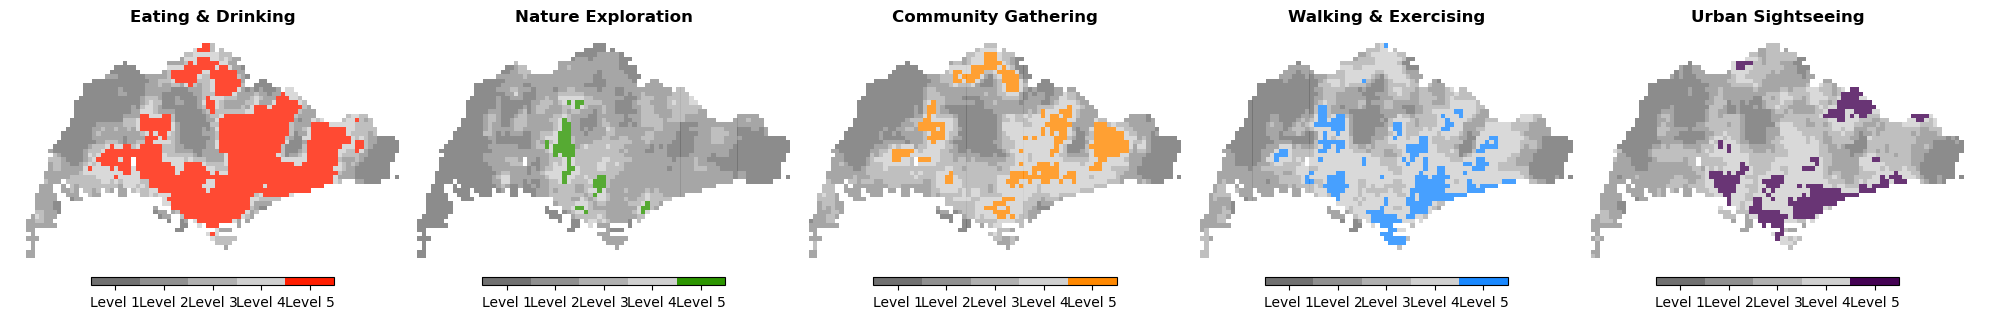

In [2]:
# Plot the UCI (Urban Comfort Index) for each social activity
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Define the UCI features to plot
uci_features = [
    'UCI_1_eating_and_drinking',
    'UCI_2_nature_exploration', 
    'UCI_3_community_gathering',
    'UCI_4_walking_and_exercising',
    'UCI_5_urban_sightseeing'
]

# Define feature labels for display
feature_labels = [
    'Eating & Drinking',
    'Nature Exploration',
    'Community Gathering', 
    'Walking & Exercising',
    'Urban Sightseeing'
]

# Define custom colours for each feature
custom_colours = ['#FF1D00', '#2C9500', '#FF8800', '#1988FF', '#440253']

# Create subplots for visualisation
fig, axes = plt.subplots(1, len(uci_features), figsize=(20, 4))

for i, feature in enumerate(uci_features):
    if feature in uci_gdf.columns:
        # Get feature values and create 5-level classification
        feature_values = uci_gdf[feature]
        
        # Create 5 equal-interval bins
        vmin = feature_values.min()
        vmax = feature_values.max()
        bins = np.linspace(vmin, vmax, 6)  # 6 edges for 5 bins
        
        # Classify values into 5 levels
        uci_gdf[f'{feature}_level'] = pd.cut(feature_values, bins=bins, labels=[1, 2, 3, 4, 5], include_lowest=True)
        
        # Define 5 discrete colours from light to dark based on the main colour
        base_colour = custom_colours[i]
        # Convert hex to RGB
        base_rgb = mcolors.hex2color(base_colour)
        
        # Create 5 discrete colours: very light grey to main colour
        discrete_colours = [
            '#707070',  # Level 1: Medium dark grey
            '#909090',  # Level 2: Medium grey
            '#B0B0B0',  # Level 3: Medium light grey
            '#D0D0D0',  # Level 4: Light grey
            base_colour  # Level 5: Main colour
        ]
        
        # Create discrete colourmap
        cmap = mcolors.ListedColormap(discrete_colours)
        
        # Plot the feature using discrete levels with square markers
        im = uci_gdf.plot(ax=axes[i], column=f'{feature}_level', cmap=cmap, alpha=0.8, 
                          markersize=10, marker='s', edgecolor='none', categorical=True)
        
        # Add colourbar with discrete levels
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.5, vmax=5.5))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=axes[i], shrink=0.6, location='bottom', pad=0.03, 
                           aspect=30, fraction=0.03, ticks=[1, 2, 3, 4, 5])
        cbar.set_ticklabels(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])
        
        # Add title for each subplot
        axes[i].set_title(feature_labels[i], fontsize=12, fontweight='bold', pad=10)
        axes[i].set_axis_off()
    else:
        axes[i].set_axis_off()

plt.tight_layout(w_pad=-1)
plt.show()


## UCP Optimisation Result Analytics

#### Create geodataframe for UCP

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read saved ucp_gdf (UCI and pUCI)
drive_path = "./Data"
ucp_gdf = gpd.read_file(f"{drive_path}/Data_UCI_pUCI.gpkg")

# check the columns
print(ucp_gdf.columns)

Index(['id', 'longitude', 'latitude', 'SP_1-E_comfort',
       'SP_2-E_sunshine_intensity', 'SP_3-E_temp_inference',
       'SP_4-E_humidity_inference', 'SP_5-E_wind_inference',
       'SP_6-E_greenery_rate', 'SP_7-E_shading_area', 'SP_8-E_heat_source',
       'SP_9-E_traffic_flow', 'SP_1-D_imageability', 'SP_2-D_enclosure',
       'SP_3-D_human_scale', 'SP_4-D_complexity', 'FC_rating', 'FC_density',
       'FC_1-R_eating_rating', 'FC_1-D_eating_density', 'FC_2-R_retail_rating',
       'FC_2-D_retail_density', 'FC_3-R_life_rating', 'FC_3-D_life_density',
       'FC_4-R_recreation_rating', 'FC_4-D_recreation_density',
       'FC_5-R_health_rating', 'FC_5-D_health_density',
       'FC_6-R_community_rating', 'FC_6-D_community_density',
       'FC_7-R_trans_rating', 'FC_7-D_trans_density', 'FC_1-H_HDB_density',
       'FC_1-G_review_polarity', 'FC_2-G_review_subjectivity',
       'AC_1-L_closeness400', 'AC_2-L_closeness800', 'AC_1-G_closeness2000',
       'AC_2-G_closeness6000', 'AC_1-T_su

#### Read UCP by feature-policy pairs

Loading optimised data for all policies and features...


Creating plots: 100%|██████████| 45/45 [00:21<00:00,  2.14it/s, Plotting UCP_5 - CD_leisure_density]     


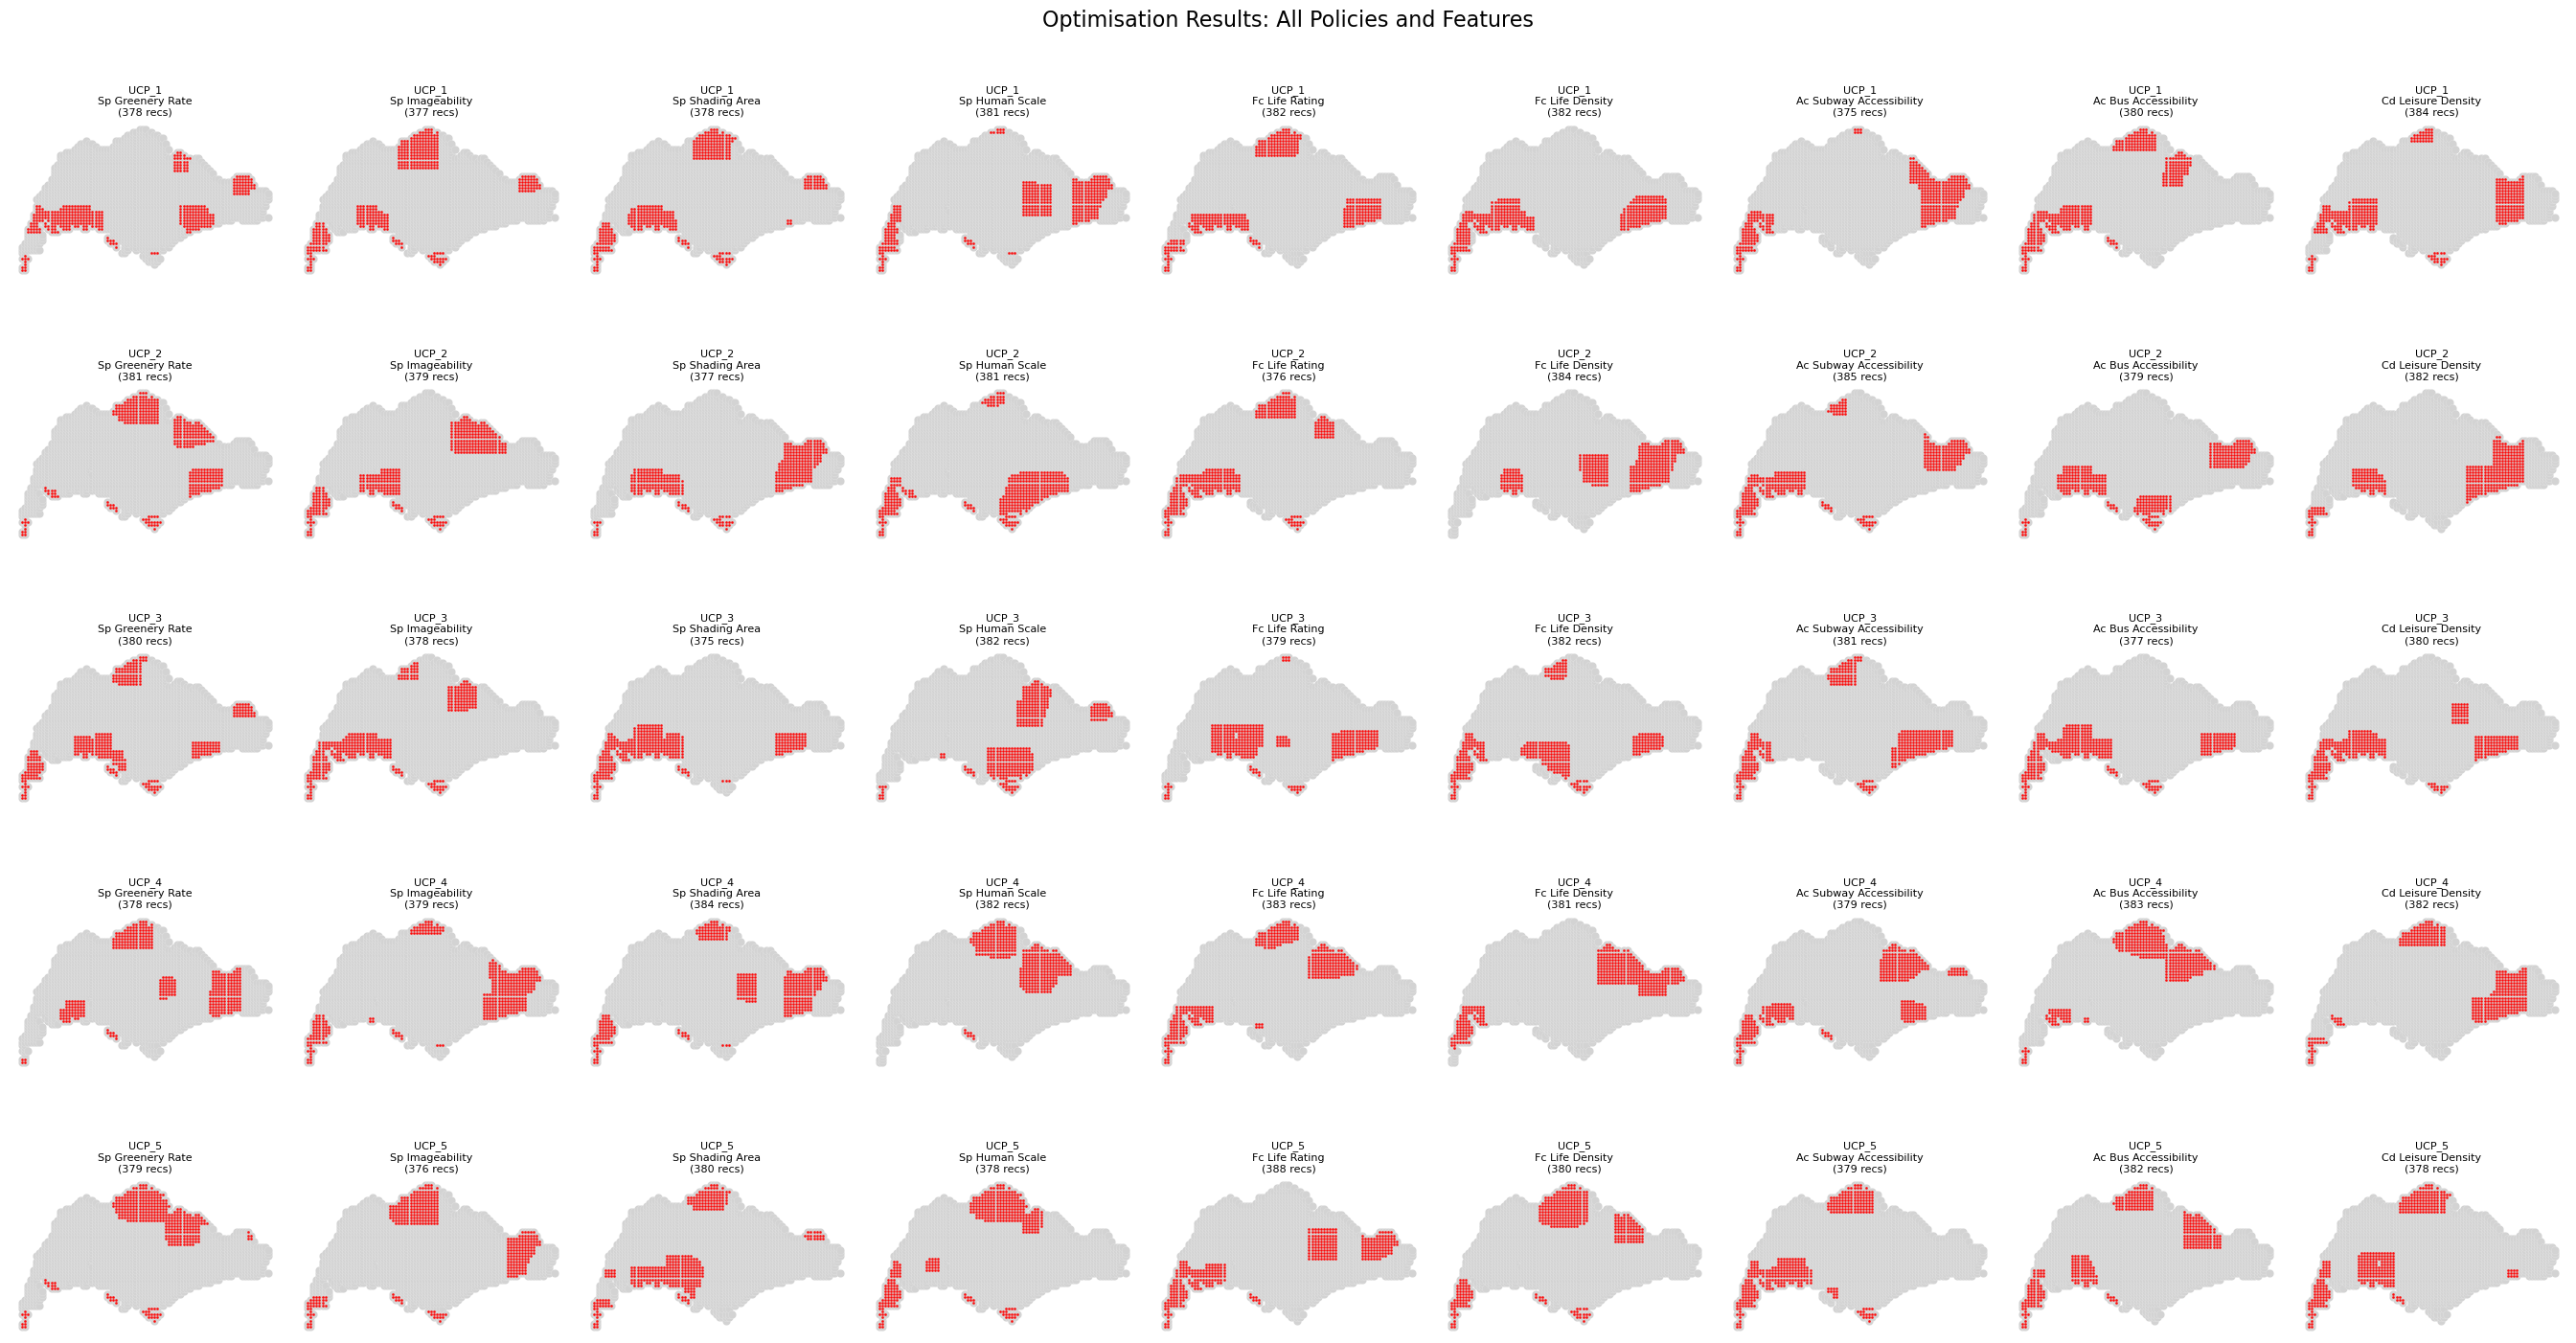


=== Recommendation Summary by Policy and Feature ===
Total spatial units in dataset: 2,096
Generating summary statistics...


Processing policies: 100%|██████████| 5/5 [00:00<00:00, 262.11it/s]


Summary Table:
Policy  SP_greenery_rate  SP_imageability  SP_shading_area  SP_human_scale  FC_life_rating  FC_life_density  AC_subway_accessibility  AC_bus_accessibility  CD_leisure_density  Total
 UCP_1               378              377              378             381             382              382                      375                   380                 384   3417
 UCP_2               381              379              377             381             376              384                      385                   379                 382   3424
 UCP_3               380              378              375             382             379              382                      381                   377                 380   3414
 UCP_4               378              379              384             382             383              381                      379                   383                 382   3431
 UCP_5               379              376              380             378

In [4]:
# Read the optimised data for all policies and all features, then visualise
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

# Define policies and features
policy_names = ['UCP_1', 'UCP_2', 'UCP_3', 'UCP_4', 'UCP_5']
feature_names = [
    'SP_greenery_rate',
    'SP_imageability', 
    'SP_shading_area',
    'SP_human_scale',
    'FC_life_rating',
    'FC_life_density',
    'AC_subway_accessibility',
    'AC_bus_accessibility',
    'CD_leisure_density'
]

# Dictionary to store all loaded data
ucp_gdfs = {}

# Calculate total number of files to load
total_files = len(policy_names) * len(feature_names)

# Load data for each policy and feature combination with progress bar
print("Loading optimised data for all policies and features...")
with tqdm(total=total_files, desc="Loading files") as pbar:
    for policy in policy_names:
        ucp_gdfs[policy] = {}
        for feature in feature_names:
            input_name = f'ising_optimisation_{policy}_{feature}'
            input_path = f'./Data/Optimisation_Result/{input_name}.gpkg'
            
            try:
                gdf = gpd.read_file(input_path)
                ucp_gdfs[policy][feature] = gdf
                pbar.set_postfix_str(f"✓ {policy} - {feature}: {len(gdf)} records")
            except Exception as e:
                pbar.set_postfix_str(f"✗ {policy} - {feature}: Error")
                ucp_gdfs[policy][feature] = None
            
            pbar.update(1)

# Create comprehensive visualisation for all policies and features
if any(any(data is not None for data in policy_data.values()) for policy_data in ucp_gdfs.values()):
    
    # Create a large subplot grid: policies as rows, features as columns
    fig, axes = plt.subplots(len(policy_names), len(feature_names), 
                            figsize=(len(feature_names)*3, len(policy_names)*3))
    
    # Ensure axes is 2D array
    if len(policy_names) == 1:
        axes = axes.reshape(1, -1)
    elif len(feature_names) == 1:
        axes = axes.reshape(-1, 1)
    
    # Plot each policy-feature combination with progress bar
    total_plots = len(policy_names) * len(feature_names)
    with tqdm(total=total_plots, desc="Creating plots") as pbar:
        for i, policy in enumerate(policy_names):
            for j, feature in enumerate(feature_names):
                ax = axes[i, j]
                
                gdf = ucp_gdfs[policy][feature]
                
                if gdf is not None:
                    # Plot base map in light grey
                    gdf.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.1)
                    
                    # Plot recommended locations in red
                    rec_col = f'{feature}_recommendation'
                    if rec_col in gdf.columns:
                        recommended = gdf[gdf[rec_col] == 1]
                        if not recommended.empty:
                            recommended.plot(ax=ax, color='red', markersize=1, alpha=0.8)
                            recommendation_count = len(recommended)
                        else:
                            recommendation_count = 0
                    else:
                        recommendation_count = 0
                    
                    # Set title
                    feature_short = feature.replace('_', ' ').title()
                    ax.set_title(f'{policy}\n{feature_short}\n({recommendation_count} recs)', 
                                fontsize=8, pad=5)
                else:
                    # If data not available, show empty plot with message
                    ax.text(0.5, 0.5, 'Data\nNot Available', 
                           ha='centre', va='centre', transform=ax.transAxes,
                           fontsize=8, color='red')
                    ax.set_title(f'{policy}\n{feature.replace("_", " ").title()}\n(No Data)', 
                                fontsize=8, pad=5)
                
                ax.set_axis_off()
                pbar.set_postfix_str(f"Plotting {policy} - {feature}")
                pbar.update(1)
    
    plt.suptitle('Optimisation Results: All Policies and Features', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    # Create summary statistics table
    print("\n=== Recommendation Summary by Policy and Feature ===")
    
    # First, get total number of spatial units from any available dataset
    total_units = None
    for policy in policy_names:
        for feature in feature_names:
            gdf = ucp_gdfs[policy][feature]
            if gdf is not None:
                total_units = len(gdf)
                break
        if total_units is not None:
            break
    
    if total_units is not None:
        print(f"Total spatial units in dataset: {total_units:,}")
    else:
        print("Could not determine total number of spatial units")
    
    summary_data = []
    
    print("Generating summary statistics...")
    for policy in tqdm(policy_names, desc="Processing policies"):
        policy_summary = {'Policy': policy}
        total_recommendations = 0
        
        for feature in feature_names:
            gdf = ucp_gdfs[policy][feature]
            if gdf is not None:
                rec_col = f'{feature}_recommendation'
                if rec_col in gdf.columns:
                    count = len(gdf[gdf[rec_col] == 1])
                else:
                    count = 0
            else:
                count = 0
            
            policy_summary[feature] = count
            total_recommendations += count
        
        policy_summary['Total'] = total_recommendations
        summary_data.append(policy_summary)
    
    # Create and display summary DataFrame
    summary_df = pd.DataFrame(summary_data)
    print("\nSummary Table:")
    print(summary_df.to_string(index=False))
    
else:
    print("No data was successfully loaded!")


#### UCP by each policy

=== Calculating feature selection overlay for each policy ===


Creating visualisation plots: 100%|██████████| 5/5 [00:00<00:00, 12.02it/s]
/var/folders/f4/33sk92_n60j6tssngt9ntw3m0000gn/T/ipykernel_14419/2118739778.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


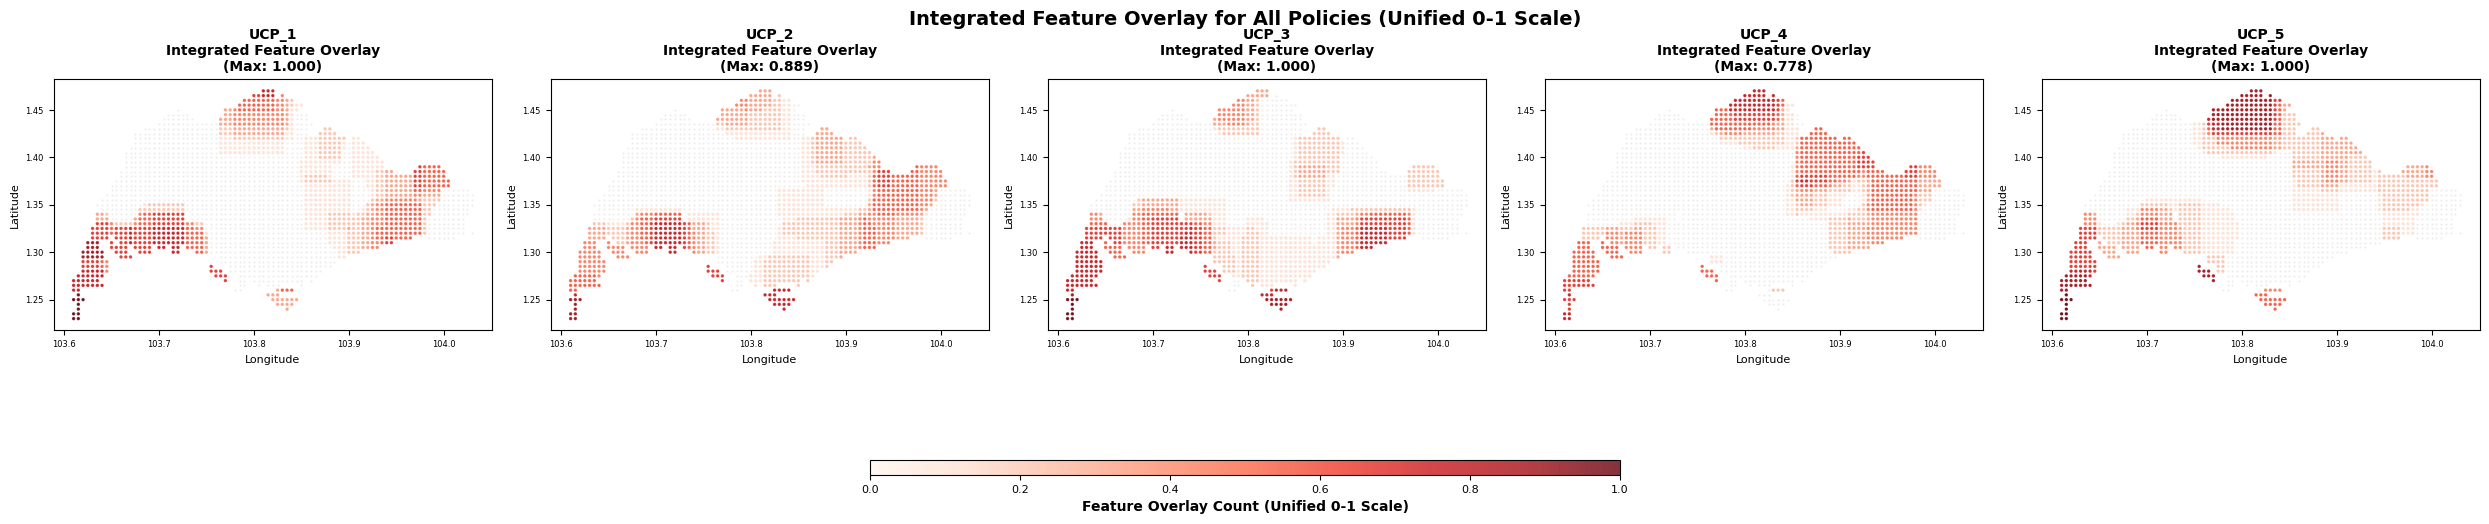

In [5]:
# Calculate feature selection overlay for each point and policy
# For each point, count how many times it's selected across all features for each policy

print("=== Calculating feature selection overlay for each policy ===")

# Initialise overlay columns in ucp_gdf for each policy
for policy in tqdm(policy_names, desc="Initialising overlay columns"):
    overlay_col = policy
    ucp_gdf[overlay_col] = 0

# Count selections for each policy and feature
for policy in tqdm(policy_names, desc="Processing policies"):
    if policy in ucp_gdfs:
        overlay_col = policy
        
        for feature in tqdm(feature_names, desc=f"Processing {policy} features", leave=False):
            if feature in ucp_gdfs[policy]:
                feature_data = ucp_gdfs[policy][feature]
                
                # Check for recommendation column
                recommendation_col = f'{feature}_recommendation'
                
                if hasattr(feature_data, 'columns') and recommendation_col in feature_data.columns:
                    # Get rows where recommendation is True/1
                    recommended_mask = feature_data[recommendation_col] == 1
                    recommended_data = feature_data[recommended_mask]
                    
                    if 'id' in recommended_data.columns:
                        selected_ids = recommended_data['id'].tolist()
                        
                        # For each selected id, increment the overlay count
                        for selected_id in selected_ids:
                            # Find matching row in ucp_gdf and increment overlay count
                            mask = ucp_gdf['id'] == selected_id
                            if mask.any():
                                ucp_gdf.loc[mask, overlay_col] += 1

# Find global maximum across all policies for unified normalisation
global_max = 0
for policy in tqdm(policy_names, desc="Finding global maximum"):
    overlay_col = policy
    if overlay_col in ucp_gdf.columns:
        policy_max = ucp_gdf[overlay_col].max()
        global_max = max(global_max, policy_max)

# Normalise all overlay counts to 0-1 range using global maximum
for policy in tqdm(policy_names, desc="Normalising overlay counts"):
    overlay_col = policy
    if overlay_col in ucp_gdf.columns:
        if global_max > 0:
            # Normalise using global maximum to ensure unified scale across policies
            ucp_gdf[overlay_col] = ucp_gdf[overlay_col] / global_max

# Display summary statistics
for policy in tqdm(policy_names, desc="Generating summary statistics"):
    overlay_col = policy
    if overlay_col in ucp_gdf.columns:
        max_overlay = ucp_gdf[overlay_col].max()
        mean_overlay = ucp_gdf[overlay_col].mean()
        points_selected = (ucp_gdf[overlay_col] > 0).sum()
        total_points = len(ucp_gdf)

# Visualise integrated feature overlay for each policy
# Use unified 0-1 scale for all policies
global_min = 0.0
global_max_norm = 1.0

# Create a figure with 5 subplots for 5 policies
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
if len(axes.shape) == 0:
    axes = [axes]
elif len(axes.shape) == 1:
    axes = axes
else:
    axes = axes.flatten()

policy_colours = ['#FF5445', '#29BB00', '#FFBC37', '#35A7FF', '#B339FF']

# Create plots with unified scale
scatters = []
for i, policy in enumerate(tqdm(policy_names, desc="Creating visualisation plots")):
    ax = axes[i]
    overlay_col = policy
    
    if overlay_col in ucp_gdf.columns:
        # Create a copy of ucp_gdf for plotting
        plot_gdf = ucp_gdf.copy()
        
        # Only plot points that have overlay count > 0
        selected_points = plot_gdf[plot_gdf[overlay_col] > 0]
        
        if len(selected_points) > 0:
            # Plot base map (all points in light grey)
            plot_gdf.plot(ax=ax, color='lightgrey', markersize=0.5, alpha=0.3)
            
            # Plot selected points with unified colour scale (0-1)
            scatter = ax.scatter(
                selected_points.geometry.x, 
                selected_points.geometry.y,
                c=selected_points[overlay_col], 
                cmap='Reds',
                s=2,
                alpha=0.8,
                vmin=0,  # Unified minimum
                vmax=1   # Unified maximum
            )
            scatters.append(scatter)
            
            # Set title and labels
            max_overlay = selected_points[overlay_col].max()
            ax.set_title(f'{policy}\nIntegrated Feature Overlay\n(Max: {max_overlay:.3f})', 
                        fontsize=10, fontweight='bold')
            ax.set_xlabel('Longitude', fontsize=8)
            ax.set_ylabel('Latitude', fontsize=8)
            
            # Set equal aspect ratio and remove axes
            ax.set_aspect('equal')
            ax.tick_params(labelsize=6)
        else:
            ax.text(0.5, 0.5, f'No data for {policy}', 
                   transform=ax.transAxes, ha='centre', va='centre')
            ax.set_title(f'{policy.upper()}\nNo Data', fontsize=10)
    else:
        ax.text(0.5, 0.5, f'Column {overlay_col} not found', 
               transform=ax.transAxes, ha='centre', va='centre')
        ax.set_title(f'{policy.upper()}\nError', fontsize=10)

# Add unified colourbar at the bottom
if scatters:
    # Create a colourbar at the bottom for all subplots with unified 0-1 scale
    cbar_ax = fig.add_axes([0.35, 0.02, 0.3, 0.03])  # [left, bottom, width, height]
    cbar = plt.colorbar(scatters[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Feature Overlay Count (Unified 0-1 Scale)', fontsize=10, fontweight='bold')
    cbar.ax.tick_params(labelsize=8)
    # Set colourbar ticks to show 0-1 range clearly
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for colourbar at bottom
plt.suptitle('Integrated Feature Overlay for All Policies (Unified 0-1 Scale)', fontsize=14, fontweight='bold', y=0.95)
plt.show()


#### Delta-UCP: specialised UCP differences with UCP 1

Calculating optimisation benefit differences between policies...
Found overlay columns: ['UCP_1', 'UCP_2', 'UCP_3', 'UCP_4', 'UCP_5']
Created optimisation benefit difference column: Delta-UCP_2
Created optimisation benefit difference column: Delta-UCP_3
Created optimisation benefit difference column: Delta-UCP_4
Created optimisation benefit difference column: Delta-UCP_5
2: 1028 points with optimisation benefit differences, Range: [-0.44, 0.44]
3: 1157 points with optimisation benefit differences, Range: [-0.56, 0.67]
4: 921 points with optimisation benefit differences, Range: [-0.78, 0.67]
5: 1057 points with optimisation benefit differences, Range: [-0.67, 0.56]


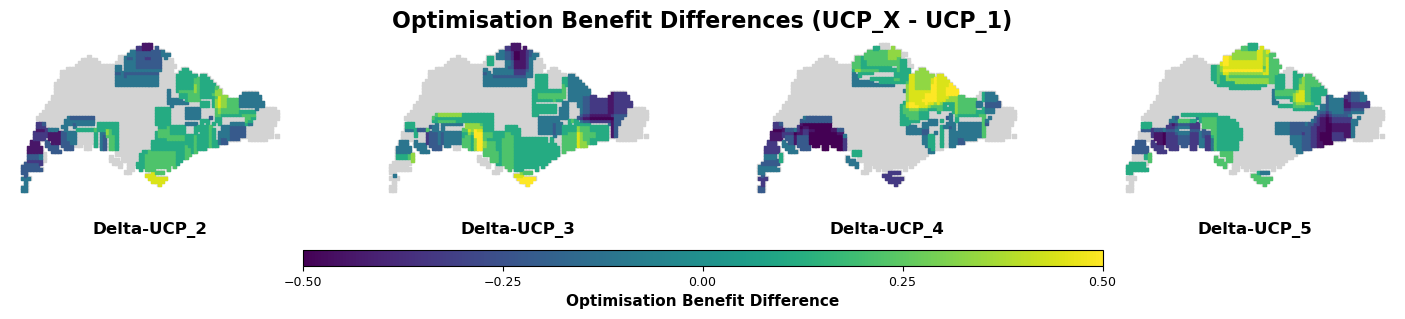


Optimisation Benefit Difference Summary Statistics:
------------------------------------------------------------
UCP_2:
  Points with optimisation benefit differences: 1028
  Mean optimisation benefit difference: 0.001
  Std optimisation benefit difference: 0.201
  Min optimisation benefit difference: -0.444
  Max optimisation benefit difference: 0.444
  Positive optimisation benefit differences: 545
  Negative optimisation benefit differences: 483

UCP_3:
  Points with optimisation benefit differences: 1157
  Mean optimisation benefit difference: -0.000
  Std optimisation benefit difference: 0.231
  Min optimisation benefit difference: -0.556
  Max optimisation benefit difference: 0.667
  Positive optimisation benefit differences: 631
  Negative optimisation benefit differences: 526

UCP_4:
  Points with optimisation benefit differences: 921
  Mean optimisation benefit difference: 0.002
  Std optimisation benefit difference: 0.316
  Min optimisation benefit difference: -0.778
  Max o

In [6]:
# Calculate and visualise the optimisation benefit difference between policy2-5 and policy1 feature overlay
print("Calculating optimisation benefit differences between policies...")

# Check if ucp_gdf exists and has the required columns
if 'ucp_gdf' in locals() or 'ucp_gdf' in globals():
    
    # Check which overlay columns exist
    overlay_columns = []
    for i in range(1, 6):  # Check for UCP_1 to UCP_5
        overlay_col = f'UCP_{i}'
        if overlay_col in ucp_gdf.columns:
            overlay_columns.append(overlay_col)
    
    print(f"Found overlay columns: {overlay_columns}")
    
    if len(overlay_columns) >= 2 and 'UCP_1' in overlay_columns:
        # Calculate optimisation benefit differences: policy2-5 minus policy1
        optimisation_benefit_diff_columns = []
        for i in range(2, 6):  # Skip UCP_1 (first policy)
            overlay_col = f'UCP_{i}'
            if overlay_col in ucp_gdf.columns:
                diff_col = f'Delta-UCP_{i}'
                ucp_gdf[diff_col] = ucp_gdf[overlay_col] - ucp_gdf['UCP_1']
                optimisation_benefit_diff_columns.append(diff_col)
                print(f"Created optimisation benefit difference column: {diff_col}")
        
        # Create visualisation with 4 plots in one row
        if optimisation_benefit_diff_columns:
            fig, axes = plt.subplots(1, 4, figsize=(16, 4))
            
            # Adjust spacing between subplots and margins
            plt.subplots_adjust(wspace=0.1, top=0.75, bottom=0.35, left=0.05, right=0.95)
            
            # Define unified colours for smooth gradient transition
            colours = ['#2279B5', '#43AA8B', '#90BE6D', '#F9C74F', '#FDE725']
            from matplotlib.colors import LinearSegmentedColormap
            custom_cmap = LinearSegmentedColormap.from_list("custom", colours, N=256)
            
            scatters = []  # Store scatter objects for colourbar
            
            for i, diff_col in enumerate(optimisation_benefit_diff_columns):
                ax = axes[i]
                
                # Plot all points with no data as light grey background
                ax.scatter(
                    ucp_gdf.geometry.x,
                    ucp_gdf.geometry.y,
                    color='lightgrey',
                    s=5,
                    marker='s',
                    label='No difference'
                )
                
                # Get non-zero differences for better visualisation
                non_zero_mask = ucp_gdf[diff_col] != 0
                plot_data = ucp_gdf[non_zero_mask]
                
                if len(plot_data) > 0:
                    # Create scatter plot with smooth gradient colourmap using square markers
                    scatter = ax.scatter(
                        plot_data.geometry.x,
                        plot_data.geometry.y,
                        c=plot_data[diff_col],
                        cmap='viridis',
                        s=5,
                        marker='s',
                        vmin=-0.5,  # Unified minimum
                        vmax=0.5    # Unified maximum
                    )
                    scatters.append(scatter)
                    
                    # Calculate statistics
                    positive_count = (plot_data[diff_col] > 0).sum()
                    negative_count = (plot_data[diff_col] < 0).sum()
                    max_diff = plot_data[diff_col].max()
                    min_diff = plot_data[diff_col].min()
                    
                    print(f"{diff_col.split('_')[1]}: {len(plot_data)} points with optimisation benefit differences, "
                          f"Range: [{min_diff:.2f}, {max_diff:.2f}]")
                
                # Remove all text, labels, ticks and spines
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_xlabel('')
                ax.set_ylabel('')
                for spine in ax.spines.values():
                    spine.set_visible(False)
                ax.set_aspect('equal')
                
                # Add title for each subplot at the bottom
                ax.text(0.5, -0.15, diff_col, 
                       transform=ax.transAxes, ha='center', va='top',
                       fontsize=12, fontweight='bold')
            
            # Add unified colourbar at the bottom, closer to the plots
            if scatters:
                cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.04])  # [left, bottom, width, height] - moved closer
                cbar = plt.colorbar(scatters[0], cax=cbar_ax, orientation='horizontal')
                cbar.set_label('Optimisation Benefit Difference', fontsize=11, fontweight='bold')
                cbar.ax.tick_params(labelsize=9)
                # Set colourbar ticks to show range clearly
                cbar.set_ticks([-0.5, -0.25, 0, 0.25, 0.5])
            
            # Add main title closer to the plots
            plt.suptitle('Optimisation Benefit Differences (UCP_X - UCP_1)', fontsize=16, fontweight='bold', y=0.82)
            
            plt.show()
            
            # Print summary statistics
            print("\nOptimisation Benefit Difference Summary Statistics:")
            print("-" * 60)
            for diff_col in optimisation_benefit_diff_columns:
                policy_name = f"UCP_{diff_col.split('_')[1]}"
                non_zero_data = ucp_gdf[ucp_gdf[diff_col] != 0][diff_col]
                if len(non_zero_data) > 0:
                    print(f"{policy_name}:")
                    print(f"  Points with optimisation benefit differences: {len(non_zero_data)}")
                    print(f"  Mean optimisation benefit difference: {non_zero_data.mean():.3f}")
                    print(f"  Std optimisation benefit difference: {non_zero_data.std():.3f}")
                    print(f"  Min optimisation benefit difference: {non_zero_data.min():.3f}")
                    print(f"  Max optimisation benefit difference: {non_zero_data.max():.3f}")
                    print(f"  Positive optimisation benefit differences: {(non_zero_data > 0).sum()}")
                    print(f"  Negative optimisation benefit differences: {(non_zero_data < 0).sum()}")
                    print()
        else:
            print("No valid optimisation benefit difference columns created.")
    else:
        print("Error: UCP_1 column not found or insufficient overlay columns.")
        print(f"Available columns: {[col for col in ucp_gdf.columns if 'UCP_' in col]}")
else:
    print("Error: ucp_gdf not found in the current environment.")

print("Optimisation benefit difference analysis completed!")

#### UCP in administrative districts

Total number of administrative districts loaded: 55
Number of administrative districts with overlapping points: 53


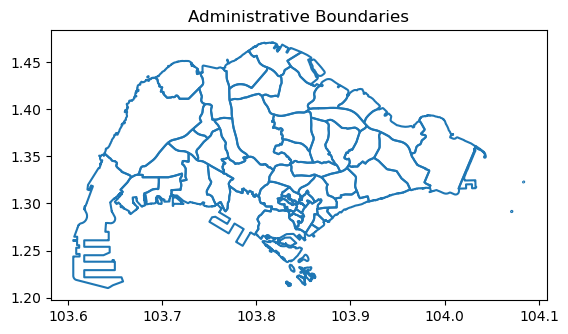

CRS of the administrative boundaries GeoDataFrame: EPSG:4326
Column names in the administrative boundaries GeoDataFrame:
Index(['Name', 'Description', 'geometry', 'PLN_AREA_N', 'PLN_AREA_C'], dtype='object')


In [7]:
# Import the administrative district GeoJSON file
admin_gdf = gpd.read_file("./Data/Data_administrative_districts.geojson")

# Output the total number of districts before filtering
print(f"Total number of administrative districts loaded: {len(admin_gdf)}")

# # Convert the CRS to EPSG:3414
# admin_gdf = admin_gdf.to_crs(epsg=3414)

# Parse 'PLN_AREA_N' from the 'Description' column, allowing for spaces in the area name
admin_gdf['PLN_AREA_N'] = admin_gdf['Description'].str.extract(r'<th>PLN_AREA_N</th>\s*<td>([\w\s]+)</td>')

# If 'PLN_AREA_N' contains three words, keep only the first two
# Handle potential NaN values by checking if x is a string
admin_gdf['PLN_AREA_N'] = admin_gdf['PLN_AREA_N'].apply(lambda x: ' '.join(x.split()[:2]) if isinstance(x, str) and len(x.split()) == 3 else x)

# Parse 'PLN_AREA_C' from the 'Description' column
admin_gdf['PLN_AREA_C'] = admin_gdf['Description'].str.extract(r'<th>PLN_AREA_C</th>\s*<td>([\w\s]+)</td>')

# Filter out areas with no overlapping points in ucp_gdf
# Fix the error by properly accessing the geometry column of ucp_gdf
admin_gdf = admin_gdf[admin_gdf.geometry.apply(lambda geom: ucp_gdf.geometry.within(geom).any())]

# Output the number of districts after filtering
print(f"Number of administrative districts with overlapping points: {len(admin_gdf)}")

# Visualise the administrative boundaries without fill and show boundary only
admin_gdf.boundary.plot()
plt.title('Administrative Boundaries')
plt.show()

# Output the Coordinate Reference System (CRS) of the GeoDataFrame
print("CRS of the administrative boundaries GeoDataFrame:", admin_gdf.crs)

# Output all column names from the GeoDataFrame
print("Column names in the administrative boundaries GeoDataFrame:")
print(admin_gdf.columns)

# # Output all samples from the GeoDataFrame without truncation
# print("All samples from the administrative boundaries GeoDataFrame without truncation:")
# print(admin_gdf.to_string())


Calculating optimisation benefit differences by administrative areas...
Found optimisation benefit difference columns: ['Delta-UCP_2', 'Delta-UCP_3', 'Delta-UCP_4', 'Delta-UCP_5']

DELTA-UCP_2 Administrative Area Statistics:
  Number of areas: 53
  Mean optimisation benefit difference: 0.050
  Std optimisation benefit difference: 0.128
  Min optimisation benefit difference: -0.265
  Max optimisation benefit difference: 0.444
  Fixed range used: [-0.5, 0.5] (values clipped to this range)
  Values below -0.5: 0
  Values above 0.5: 0

DELTA-UCP_3 Administrative Area Statistics:
  Number of areas: 53
  Mean optimisation benefit difference: 0.032
  Std optimisation benefit difference: 0.146
  Min optimisation benefit difference: -0.395
  Max optimisation benefit difference: 0.532
  Fixed range used: [-0.5, 0.5] (values clipped to this range)
  Values below -0.5: 0
  Values above 0.5: 1

DELTA-UCP_4 Administrative Area Statistics:
  Number of areas: 53
  Mean optimisation benefit difference:

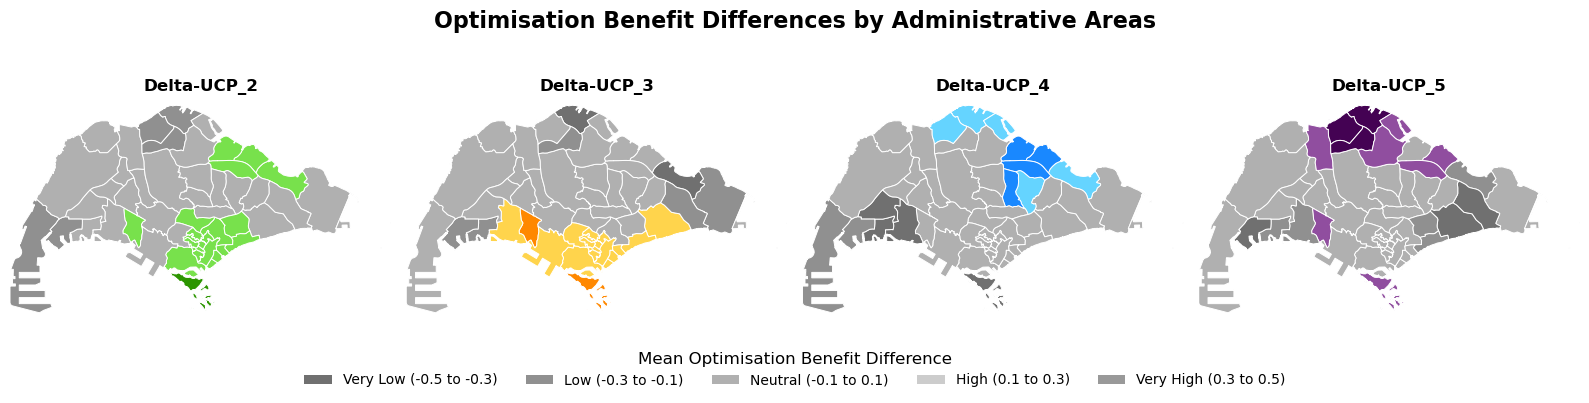


Administrative Area Optimisation Benefit Difference Summary:

DELTA-UCP_2:
----------------------------------------
  SOUTHERN ISLANDS         :    0.444 (n=14)
  SINGAPORE RIVER          :    0.222 (n=3)
  STRAITS VIEW             :    0.222 (n=2)
  OUTRAM                   :    0.222 (n=4)
  DOWNTOWN CORE            :    0.203 (n=17)
  BUKIT MERAH              :    0.202 (n=45)
  MUSEUM                   :    0.185 (n=3)
  PASIR RIS                :    0.184 (n=50)
  KALLANG                  :    0.167 (n=26)
  RIVER VALLEY             :    0.156 (n=5)
  MARINE PARADE            :    0.152 (n=19)
  SENGKANG                 :    0.152 (n=38)
  PUNGGOL                  :    0.137 (n=30)
  MARINA SOUTH             :    0.133 (n=5)
  CLEMENTI                 :    0.129 (n=31)
  MARINA EAST              :    0.125 (n=8)
  SELETAR                  :    0.111 (n=31)
  ROCHOR                   :    0.111 (n=6)
  NEWTON                   :    0.111 (n=8)
  ORCHARD                  :    0.111

In [11]:
# Calculate and visualise optimisation benefit differences by administrative areas
print("Calculating optimisation benefit differences by administrative areas...")

# Check if we have the required data
if 'ucp_gdf' in locals() or 'ucp_gdf' in globals():
    # Get optimisation benefit difference columns
    optimisation_benefit_diff_columns = [col for col in ucp_gdf.columns if col.startswith('Delta-UCP')]
    
    if optimisation_benefit_diff_columns and 'admin_gdf' in locals():
        print(f"Found optimisation benefit difference columns: {optimisation_benefit_diff_columns}")
        
        # Calculate mean optimisation benefit differences for each administrative area
        admin_results = {}
        
        for diff_col in optimisation_benefit_diff_columns:
            policy_name = diff_col.replace('_optimisation_benefit_diff', '')
            admin_results[policy_name] = []
            
            for idx, admin_area in admin_gdf.iterrows():
                # Find UCP points within this administrative area
                within_mask = ucp_gdf.geometry.within(admin_area.geometry)
                points_in_area = ucp_gdf[within_mask]
                
                if len(points_in_area) > 0:
                    # Calculate mean optimisation benefit difference for this area
                    mean_diff = points_in_area[diff_col].mean()
                    admin_results[policy_name].append({
                        'PLN_AREA_N': admin_area['PLN_AREA_N'],
                        'geometry': admin_area.geometry,
                        'mean_optimisation_benefit_diff': mean_diff,
                        'point_count': len(points_in_area)
                    })
        
        # Create visualisation with administrative areas
        if admin_results:
            # Create subplots - one for each policy
            n_policies = len(admin_results)
            fig, axes = plt.subplots(1, n_policies, figsize=(4*n_policies, 6))
            
            # If only one policy, make axes iterable
            if n_policies == 1:
                axes = [axes]
            
            # Add main title with reduced y position to bring it closer to plots
            fig.suptitle('Optimisation Benefit Differences by Administrative Areas', 
                        fontsize=16, fontweight='bold', y=0.80)
            
            # Adjust spacing between subplots - reduce wspace to make subplots more compact
            plt.subplots_adjust(wspace=0.0001, top=0.88, bottom=0.15)
            
            # Define custom colours for each policy
            policy_colours = ['#2C9500', '#FF8800', '#1988FF', '#440253']
            
            # Define fixed bins for all policies: -0.5 to 0.5 divided into 5 levels
            fixed_bins = np.linspace(-0.5, 0.5, 6)  # 6 edges for 5 bins
            
            for i, (policy_name, policy_data) in enumerate(admin_results.items()):
                ax = axes[i]
                
                if policy_data:
                    # Create GeoDataFrame for this policy's administrative results
                    policy_admin_gdf = gpd.GeoDataFrame(policy_data)
                    
                    # Get optimisation benefit difference values and clip to [-0.5, 0.5] range
                    diff_values = policy_admin_gdf['mean_optimisation_benefit_diff']
                    # Clip values: values below -0.5 become -0.5, values above 0.5 become 0.5
                    clipped_values = np.clip(diff_values, -0.5, 0.5)
                    
                    # Classify clipped values into 5 levels using fixed bins (-0.5 to 0.5)
                    policy_admin_gdf['diff_level'] = pd.cut(clipped_values, bins=fixed_bins, labels=[1, 2, 3, 4, 5], include_lowest=True)
                    
                    # Define 5 discrete colours from light grey to main colour
                    base_colour = policy_colours[i % len(policy_colours)]
                    
                    # Create 5 discrete colours: medium grey to main colour
                    # Level 4 uses a lighter version of the main colour
                    from matplotlib.colors import to_rgb
                    base_rgb = to_rgb(base_colour)
                    # Create a lighter version of the base colour for level 4
                    level4_colour = tuple(min(1.0, c + 0.3) for c in base_rgb)
                    level4_hex = '#{:02x}{:02x}{:02x}'.format(int(level4_colour[0]*255), int(level4_colour[1]*255), int(level4_colour[2]*255))
                    
                    discrete_colours = [
                        '#707070',  # Level 1: Medium dark grey (-0.5 to -0.3)
                        '#909090',  # Level 2: Medium grey (-0.3 to -0.1)
                        '#B0B0B0',  # Level 3: Medium light grey (-0.1 to 0.1)
                        level4_hex, # Level 4: Lighter version of main colour (0.1 to 0.3)
                        base_colour  # Level 5: Main colour (0.3 to 0.5)
                    ]
                    
                    # Create discrete colourmap
                    cmap = mcolors.ListedColormap(discrete_colours)
                    
                    # Plot administrative boundaries with discrete levels
                    policy_admin_gdf.plot(
                        column='diff_level',
                        cmap=cmap,
                        ax=ax,
                        legend=False,
                        edgecolor='white',
                        linewidth=0.7,
                        categorical=True
                    )
                    
                    # Print statistics for this policy
                    mean_values = [area['mean_optimisation_benefit_diff'] for area in policy_data]
                    print(f"\n{policy_name.upper()} Administrative Area Statistics:")
                    print(f"  Number of areas: {len(policy_data)}")
                    print(f"  Mean optimisation benefit difference: {np.mean(mean_values):.3f}")
                    print(f"  Std optimisation benefit difference: {np.std(mean_values):.3f}")
                    print(f"  Min optimisation benefit difference: {min(mean_values):.3f}")
                    print(f"  Max optimisation benefit difference: {max(mean_values):.3f}")
                    print(f"  Fixed range used: [-0.5, 0.5] (values clipped to this range)")
                    print(f"  Values below -0.5: {sum(1 for v in mean_values if v < -0.5)}")
                    print(f"  Values above 0.5: {sum(1 for v in mean_values if v > 0.5)}")
                
                # Add subtitle for each policy
                ax.set_title(f'{policy_name}', fontsize=12, fontweight='bold', pad=10)
                
                # Remove axis ticks and labels
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_xlabel('')
                ax.set_ylabel('')
                
                # Remove subplot borders
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
                
                # Set aspect ratio and make plots more compact by adjusting margins
                ax.set_aspect('equal')
                ax.margins(0)
            
            # Create a shared legend for all subplots
            # Create legend elements
            legend_labels = [
                'Very Low (-0.5 to -0.3)',
                'Low (-0.3 to -0.1)', 
                'Neutral (-0.1 to 0.1)',
                'High (0.1 to 0.3)',
                'Very High (0.3 to 0.5)'
            ]
            legend_colours = [
                '#707070',  # Very Low
                '#909090',  # Low
                '#B0B0B0',  # Neutral
                '#CCCCCC',  # High (placeholder, will be policy-specific)
                '#999999'   # Very High (placeholder, will be policy-specific)
            ]
            
            # Create legend patches
            from matplotlib.patches import Patch
            legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(legend_colours, legend_labels)]
            
            # Add legend below the plots with reduced bbox_to_anchor y position to bring it closer
            fig.legend(handles=legend_patches, 
                      title='Mean Optimisation Benefit Difference',
                      title_fontsize=12,
                      fontsize=10,
                      loc='lower center', 
                      bbox_to_anchor=(0.5, 0.15),
                      ncol=5,
                      frameon=False)
            
            # Save the figure with tight layout to remove extra whitespace
            plt.tight_layout()
            print("\nFigure saved as 'admin_optimisation_benefit_differences.png'")
            
            plt.show()
            
            # Create a summary table
            print("\nAdministrative Area Optimisation Benefit Difference Summary:")
            print("=" * 80)
            for policy_name, policy_data in admin_results.items():
                if policy_data:
                    print(f"\n{policy_name.upper()}:")
                    print("-" * 40)
                    for area in sorted(policy_data, key=lambda x: x['mean_optimisation_benefit_diff'], reverse=True):
                        print(f"  {area['PLN_AREA_N']:<25}: {area['mean_optimisation_benefit_diff']:>8.3f} "
                              f"(n={area['point_count']})")
        else:
            print("No administrative area results to visualise.")
    else:
        print("Error: Required data not found.")
        if not optimisation_benefit_diff_columns:
            print("  - No optimisation benefit difference columns found")
        if 'admin_gdf' not in locals():
            print("  - Administrative boundaries data (admin_gdf) not found")
else:
    print("Error: ucp_gdf not found in the current environment.")

print("\nAdministrative area optimisation benefit difference analysis completed!")


Creating level distribution visualisation for administrative areas...

Delta-UCP_2 - High Performance Levels:
  Level 4: 21 areas (39.6%)
  Level 5: 1 areas (1.9%)
  Combined Level 4+5: 22 areas (41.5%)

Delta-UCP_3 - High Performance Levels:
  Level 4: 17 areas (32.1%)
  Level 5: 2 areas (3.8%)
  Combined Level 4+5: 19 areas (35.8%)

Delta-UCP_4 - High Performance Levels:
  Level 4: 5 areas (9.4%)
  Level 5: 4 areas (7.5%)
  Combined Level 4+5: 9 areas (17.0%)

Delta-UCP_5 - High Performance Levels:
  Level 4: 7 areas (13.2%)
  Level 5: 3 areas (5.7%)
  Combined Level 4+5: 10 areas (18.9%)


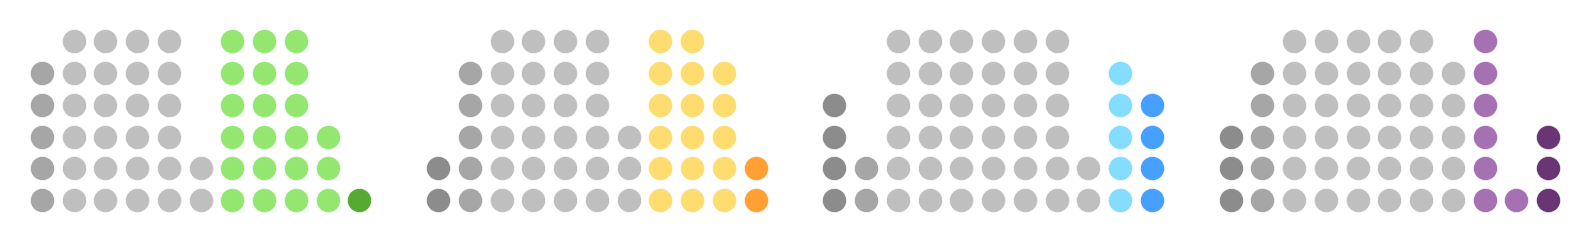

In [13]:
# Create level distribution visualisation for each policy
print("Creating level distribution visualisation for administrative areas...")

if 'admin_results' in locals() and admin_results:
    # Create subplots - one for each policy showing level distribution
    n_policies = len(admin_results)
    fig, axes = plt.subplots(1, n_policies, figsize=(4*n_policies, 6))
    
    # If only one policy, make axes iterable
    if n_policies == 1:
        axes = [axes]
    
    # Adjust spacing between subplots - 调整子图之间的间距
    plt.subplots_adjust(wspace=0.1)  # wspace控制子图之间的水平间距
    
    # Define custom colours for each policy (matching previous visualisation)
    policy_colours = ['#2C9500', '#FF8800', '#1988FF', '#440253']
    
    # Define fixed bins for all policies: -0.5 to 0.5 divided into 5 levels
    fixed_bins = np.linspace(-0.5, 0.5, 6)  # 6 edges for 5 bins
    
    for i, (policy_name, policy_data) in enumerate(admin_results.items()):
        ax = axes[i]
        
        if policy_data:
            # Get optimisation benefit difference values and clip to [-0.5, 0.5] range
            diff_values = [area['mean_optimisation_benefit_diff'] for area in policy_data]
            clipped_values = np.clip(diff_values, -0.5, 0.5)
            
            # Classify clipped values into 5 levels using fixed bins
            levels = pd.cut(clipped_values, bins=fixed_bins, labels=[1, 2, 3, 4, 5], include_lowest=True)
            level_counts = levels.value_counts().sort_index()
            
            # Calculate percentages for level 4 and level 5
            total_areas = len(diff_values)
            level4_count = level_counts.get(4, 0)
            level5_count = level_counts.get(5, 0)
            level4_percentage = (level4_count / total_areas) * 100 if total_areas > 0 else 0
            level5_percentage = (level5_count / total_areas) * 100 if total_areas > 0 else 0
            
            print(f"\n{policy_name} - High Performance Levels:")
            print(f"  Level 4: {level4_count} areas ({level4_percentage:.1f}%)")
            print(f"  Level 5: {level5_count} areas ({level5_percentage:.1f}%)")
            print(f"  Combined Level 4+5: {level4_count + level5_count} areas ({level4_percentage + level5_percentage:.1f}%)")
            
            # Define colours for each level (matching previous visualisation)
            base_colour = policy_colours[i % len(policy_colours)]
            from matplotlib.colors import to_rgb
            base_rgb = to_rgb(base_colour)
            level4_colour = tuple(min(1.0, c + 0.3) for c in base_rgb)
            level4_hex = '#{:02x}{:02x}{:02x}'.format(int(level4_colour[0]*255), int(level4_colour[1]*255), int(level4_colour[2]*255))
            
            level_colours = [
                '#707070',  # Level 1: Medium dark grey
                '#909090',  # Level 2: Medium grey
                '#B0B0B0',  # Level 3: Medium light grey
                level4_hex, # Level 4: Lighter version of main colour
                base_colour  # Level 5: Main colour
            ]
            
            # Create grid-based visualisation
            dot_size = 300  # Increased dot size for better visibility
            grid_spacing = 0.1  # 调整网格间距 - 控制点之间的水平和垂直距离
            dots_per_column = 6  # 调整每列点数 - 控制垂直方向的密度
            
            # Calculate grid positions for each level - each level gets its own columns
            current_col = 0
            
            for level in [1, 2, 3, 4, 5]:  # Process levels in order
                count = level_counts.get(level, 0)
                colour = level_colours[level-1]
                
                if count > 0:
                    x_positions = []
                    y_positions = []
                    
                    # Calculate how many columns this level needs
                    cols_needed = (count - 1) // dots_per_column + 1
                    
                    for dot_idx in range(count):
                        # Calculate position within this level's columns
                        col_within_level = dot_idx // dots_per_column
                        row_within_level = dot_idx % dots_per_column
                        
                        # Calculate actual grid position with consistent spacing
                        # 水平位置 - 控制列间距
                        x_pos = (current_col + col_within_level) * grid_spacing
                        # 垂直位置 - 控制行间距
                        y_pos = row_within_level * grid_spacing  # Same spacing as horizontal
                        
                        x_positions.append(x_pos)
                        y_positions.append(y_pos)
                    
                    # Plot dots at grid positions with consistent colour
                    ax.scatter(x_positions, y_positions, s=dot_size, c=colour, alpha=0.8, 
                              edgecolors='white', linewidth=0.5)
                    
                    # Move to next set of columns for the next level
                    current_col += cols_needed
            
            # Set axis limits and remove ticks - more compact layout with equal aspect ratio
            # 调整坐标轴范围 - 控制整体布局的紧凑程度
            ax.set_xlim(-0.1, current_col * grid_spacing)  # 水平范围
            ax.set_ylim(-0.1, dots_per_column * grid_spacing)  # 垂直范围
            ax.set_aspect('equal')  # Ensure equal aspect ratio for consistent spacing
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Remove all spines
            for spine in ax.spines.values():
                spine.set_visible(False)
    
    plt.tight_layout()  # 自动调整整体布局间距
    plt.show()
    
else:
    print("No administrative area results available for level distribution visualisation.")


#### PCA of Delta-UCP

Creating policy optimisation difference gradient latent analysis...


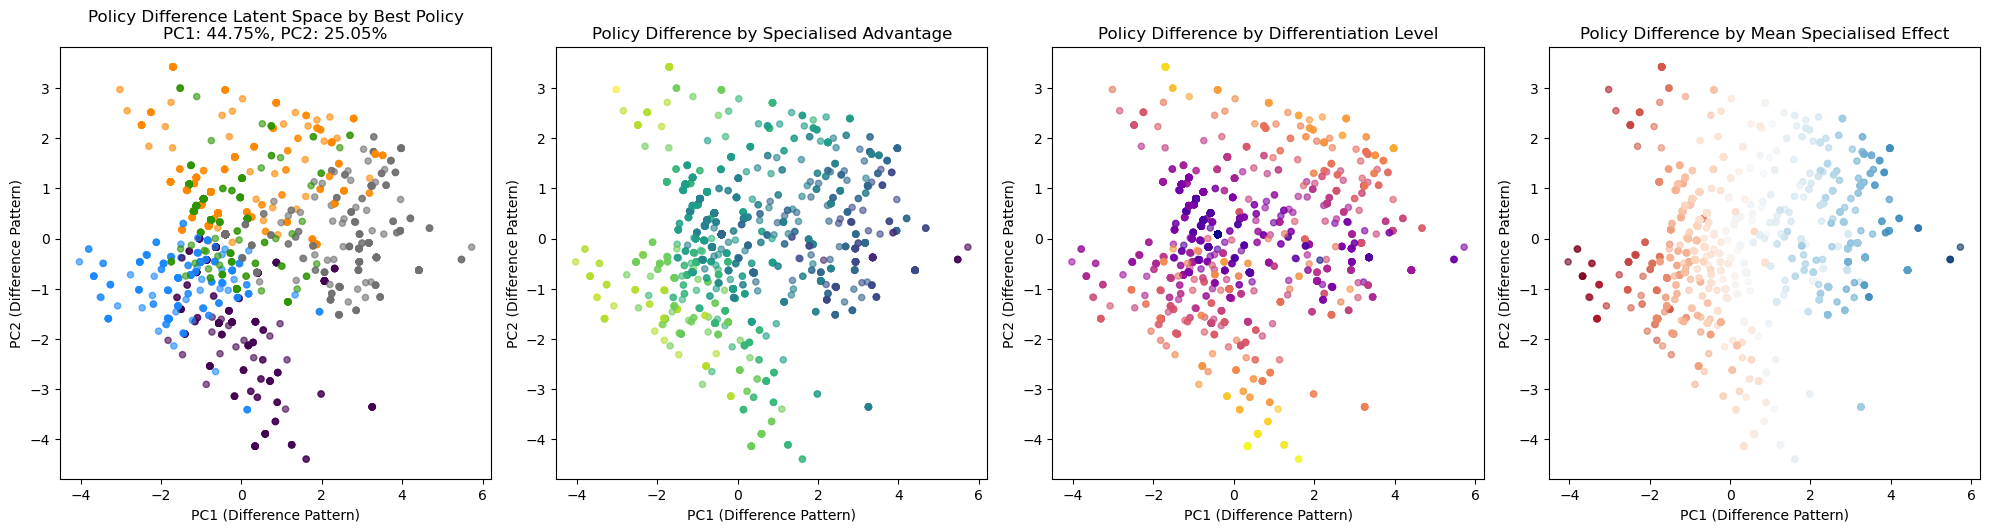


Policy Difference Latent Space Analysis Summary:
Policy Difference PCA - PC1: 44.75% variance
Policy Difference PCA - PC2: 25.05% variance
Total explained variance: 69.79%

Policy Recommendation Distribution:
  Baseline Policy Focus: 70 areas (3.3%)
  Strong Specialised Policy: 1203 areas (57.4%)
  Policy Flexible: 158 areas (7.5%)
  Maintain Status Quo: 665 areas (31.7%)


In [16]:
# Policy optimisation difference gradient latent analysis
print("Creating policy optimisation difference gradient latent analysis...")

# Import required modules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

# Extract policy difference data (relative to baseline policy differences)
policy_diffs = ['Delta-UCP_2', 'Delta-UCP_3', 
                'Delta-UCP_4', 'Delta-UCP_5']

# Calculate policy difference gradients
policy_diff_data = ucp_gdf[policy_diffs].fillna(0)

# Add baseline policy priority as reference
policy_diff_with_base = policy_diff_data.copy()
policy_diff_with_base['UCP_1_baseline'] = ucp_gdf['UCP_1']

# Standardise
scaler = StandardScaler()
diff_data_scaled = scaler.fit_transform(policy_diff_with_base)

# PCA dimensionality reduction
pca_diff = PCA(n_components=2)
diff_latent = pca_diff.fit_transform(diff_data_scaled)

# Create visualisation - using one row with four subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Define custom colours for each policy (matching the administrative area visualisation)
policy_colours = ['#2C9500', '#FF8800', '#1988FF', '#440253']

# Subplot 1: Coloured by optimal specialised policy
ax = axes[0]
best_specialised_policies = []
best_diff_values = []
for idx, row in ucp_gdf.iterrows():
    diffs = [row['Delta-UCP_2'], row['Delta-UCP_3'], 
             row['Delta-UCP_4'], row['Delta-UCP_5']]
    max_diff = max(diffs)
    if max_diff > 0.05:  # Significant specialised policy advantage
        best_policy = np.argmax(diffs) + 2
    else:
        best_policy = 1  # Baseline policy optimal
    best_specialised_policies.append(best_policy)
    best_diff_values.append(max_diff)

# Create custom colourmap for policies
from matplotlib.colors import ListedColormap
policy_cmap_colours = ['#707070'] + policy_colours  # Grey for baseline, then policy colours
policy_cmap = ListedColormap(policy_cmap_colours)

scatter1 = ax.scatter(diff_latent[:, 0], diff_latent[:, 1], 
                     c=best_specialised_policies, cmap=policy_cmap, alpha=0.6, s=20)
ax.set_title(f'Policy Difference Latent Space by Best Policy\nPC1: {pca_diff.explained_variance_ratio_[0]:.2%}, PC2: {pca_diff.explained_variance_ratio_[1]:.2%}')
ax.set_xlabel('PC1 (Difference Pattern)')
ax.set_ylabel('PC2 (Difference Pattern)')
ax.set_box_aspect(1)  # Force square aspect ratio

# Subplot 2: Coloured by specialised policy advantage intensity
ax = axes[1]
scatter2 = ax.scatter(diff_latent[:, 0], diff_latent[:, 1], 
                     c=best_diff_values, cmap='viridis', alpha=0.6, s=20)
ax.set_title('Policy Difference by Specialised Advantage')
ax.set_xlabel('PC1 (Difference Pattern)')
ax.set_ylabel('PC2 (Difference Pattern)')
ax.set_box_aspect(1)  # Force square aspect ratio

# Subplot 3: Coloured by policy differentiation level
ax = axes[2]
policy_differentiation = ucp_gdf[policy_diffs].std(axis=1)
scatter3 = ax.scatter(diff_latent[:, 0], diff_latent[:, 1], 
                     c=policy_differentiation, cmap='plasma', alpha=0.6, s=20)
ax.set_title('Policy Difference by Differentiation Level')
ax.set_xlabel('PC1 (Difference Pattern)')
ax.set_ylabel('PC2 (Difference Pattern)')
ax.set_box_aspect(1)  # Force square aspect ratio

# Subplot 4: Coloured by average specialised policy effect
ax = axes[3]
mean_specialised_effect = ucp_gdf[policy_diffs].mean(axis=1)
scatter4 = ax.scatter(diff_latent[:, 0], diff_latent[:, 1], 
                     c=mean_specialised_effect, cmap='RdBu_r', alpha=0.6, s=20)
ax.set_title('Policy Difference by Mean Specialised Effect')
ax.set_xlabel('PC1 (Difference Pattern)')
ax.set_ylabel('PC2 (Difference Pattern)')
ax.set_box_aspect(1)  # Force square aspect ratio

plt.tight_layout()
plt.show()

# Print latent space interpretation
print("\nPolicy Difference Latent Space Analysis Summary:")
print("=" * 60)
print(f"Policy Difference PCA - PC1: {pca_diff.explained_variance_ratio_[0]:.2%} variance")
print(f"Policy Difference PCA - PC2: {pca_diff.explained_variance_ratio_[1]:.2%} variance")
print(f"Total explained variance: {sum(pca_diff.explained_variance_ratio_):.2%}")

# Analyse policy recommendation types
policy_recommendations = []
for i, row in ucp_gdf.iterrows():
    max_diff = max([row['Delta-UCP_2'], row['Delta-UCP_3'], 
                    row['Delta-UCP_4'], row['Delta-UCP_5']])
    baseline_priority = row['UCP_1']
    
    if max_diff > 0.1:  # Strong specialised policy advantage
        rec = "Strong Specialised Policy"
    elif max_diff > 0.05:  # Moderate specialised policy advantage
        rec = "Moderate Specialised Policy"
    elif baseline_priority > 0.7:  # High baseline policy priority
        rec = "Baseline Policy Focus"
    elif baseline_priority < 0.3:  # Low priority areas
        rec = "Maintain Status Quo"
    else:
        rec = "Policy Flexible"
    policy_recommendations.append(rec)

recommendation_counts = Counter(policy_recommendations)
print("\nPolicy Recommendation Distribution:")
for rec, count in recommendation_counts.items():
    percentage = (count / len(policy_recommendations)) * 100
    print(f"  {rec}: {count} areas ({percentage:.1f}%)")

/Users/sijieyang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sijieyang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sijieyang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sijieyang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

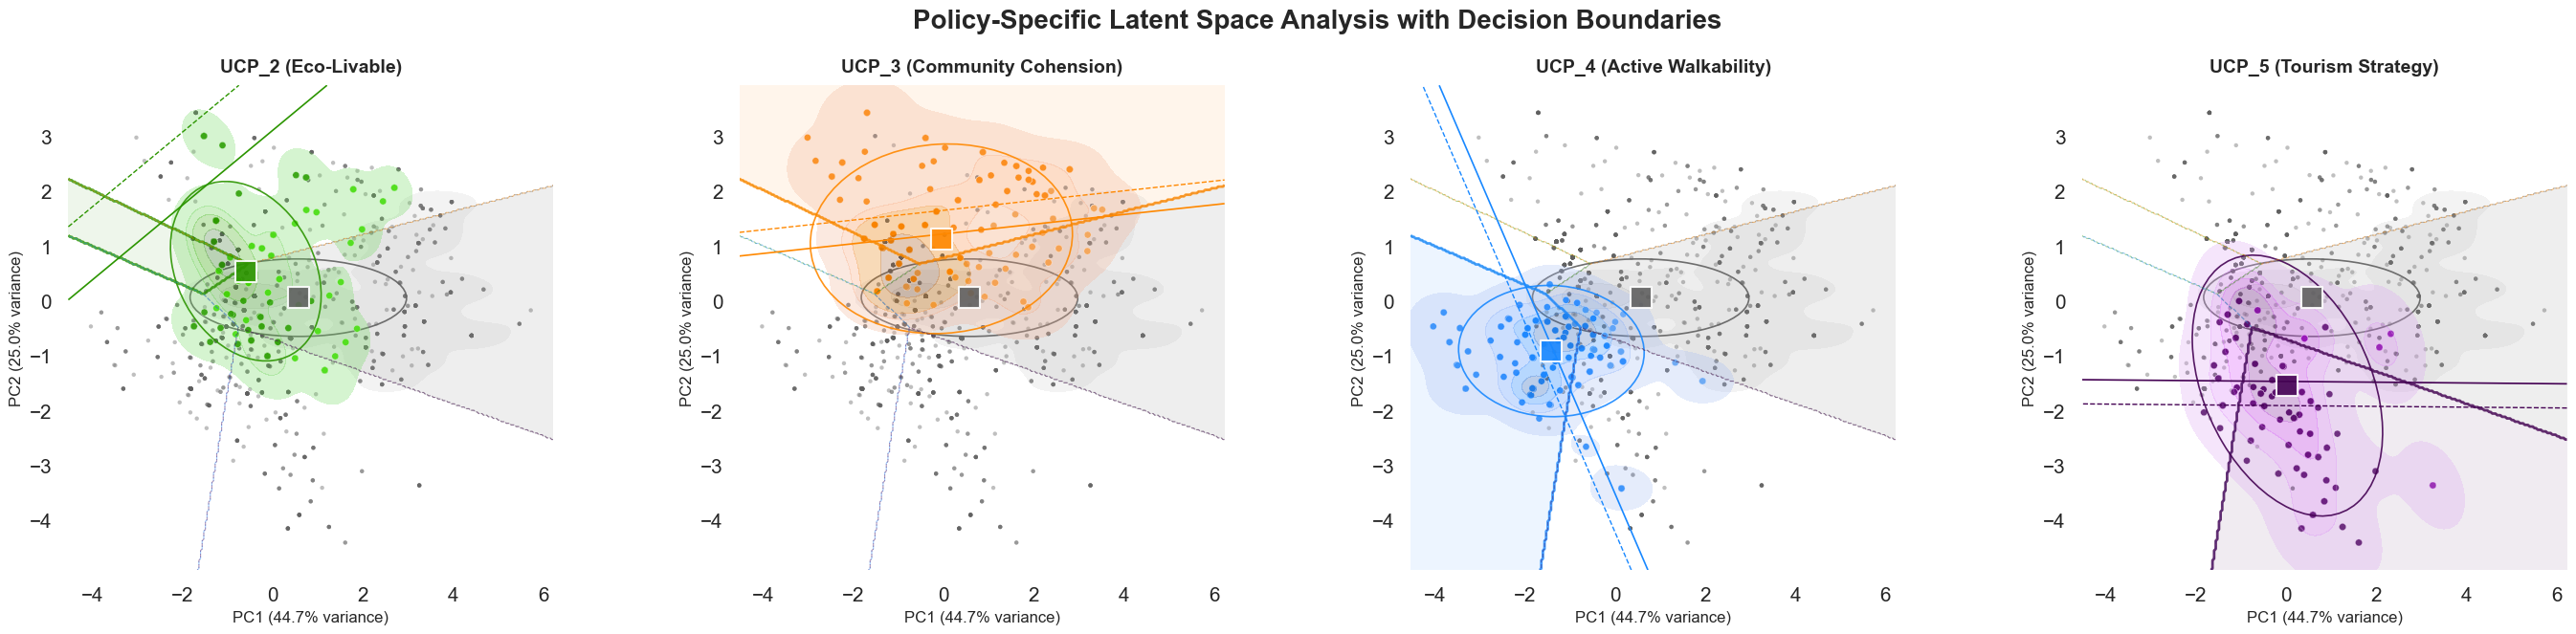

In [23]:
# Policy-specific latent panels (1x4): scatter + KDE + decision boundary + ellipse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from colorsys import rgb_to_hls, hls_to_rgb

sns.set_context("talk", font_scale=0.9)
sns.set_style("white")

# --- data prep ---
policy_diffs = ['Delta-UCP_2', 'Delta-UCP_3', 
                'Delta-UCP_4', 'Delta-UCP_5']
diff_df = ucp_gdf[policy_diffs].fillna(0).copy()
diff_df['UCP_1_baseline'] = ucp_gdf['UCP_1']

scaler = StandardScaler()
X = scaler.fit_transform(diff_df)

pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(X)  # latent 2D

diffs = ucp_gdf[policy_diffs].values  # shape (n,4) for P2..P5
max_idx = np.argmax(diffs, axis=1)               # 0..3 => policy2..5
max_val = np.take_along_axis(diffs, max_idx[:,None], axis=1).ravel()
best_policy = np.where(max_val > 0.05, max_idx + 2, 1)  # 1=baseline if weak advantage

BASELINE = '#606060'  # darker gray for better visibility in papers
PALETTE = {1:'#606060', 2:'#2C9500', 3:'#FF8800', 4:'#1988FF', 5:'#440253'}

def hex2rgb(h):
    r,g,b = to_rgb(h); return np.array([r,g,b])

def shade_by_strength(base_hex, val):
    # perceptual HLS shading: val∈[0,1] (stronger -> darker & slightly more saturated)
    r,g,b = to_rgb(base_hex)
    h,l,s = rgb_to_hls(r,g,b)
    l_new = 1.0 - (1.0 - l) * val
    s_new = s * (0.6 + 0.4*val)
    rr,gg,bb = hls_to_rgb(h, l_new, s_new)
    return (rr,gg,bb)

def add_confidence_ellipse(ax, x, y, color, q=2.0):
    # q≈2: about 95% if Gaussian
    if len(x) < 5: 
        return
    X = np.column_stack([x, y])
    mu = X.mean(axis=0)
    cov = np.cov(X, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:,order]
    angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
    width, height = 2*q*np.sqrt(eigvals)
    e = Ellipse(xy=mu, width=width, height=height, angle=angle,
                edgecolor=color, facecolor='none', lw=1.2, alpha=0.9)
    ax.add_patch(e)

# Train multi-class classifier for decision boundaries
clf_multi = LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42)
clf_multi.fit(Z, best_policy)

fig, axes = plt.subplots(1, 4, figsize=(28, 6), constrained_layout=True)

# Add main title
fig.suptitle('Policy-Specific Latent Space Analysis with Decision Boundaries', 
             fontsize=20, fontweight='bold', y=1.08)

# common bounds
x_min, x_max = Z[:,0].min()-0.5, Z[:,0].max()+0.5
y_min, y_max = Z[:,1].min()-0.5, Z[:,1].max()+0.5

# Create decision boundary grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
decision_proba = clf_multi.predict_proba(grid_points)
decision_pred = clf_multi.predict(grid_points).reshape(xx.shape)

policies = [2,3,4,5]
names = {2:'UCP_2 (Eco-Livable)', 3:'UCP_3 (Community Cohension)', 4:'UCP_4 (Active Walkability)', 5:'UCP_5 (Tourism Strategy)'}

# Get baseline mask for all subplots
mask_baseline = (best_policy == 1)

for idx, p in enumerate(policies):
    ax = axes[idx]
    ax.set_box_aspect(1)
    sns.despine(ax=ax, left=True, bottom=True)
    
    # Add axis labels and subtitle
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
    ax.set_title(names[p], fontsize=14, fontweight='bold', pad=10)
    
    color = PALETTE[p]
    j = p - 2  # column in diffs
    adv = diffs[:, j]

    # Add background decision regions with deeper coloring
    # Create a mask for current policy's decision region
    policy_region_mask = (decision_pred == p)
    baseline_region_mask = (decision_pred == 1)
    
    # Color the background regions with deeper colors
    if policy_region_mask.any():
        # Current policy region in very light version of policy color
        policy_bg_color = hex2rgb(color) * 0.15 + 0.85  # very light tint
        ax.contourf(xx, yy, policy_region_mask.astype(float), levels=[0.5, 1.5], 
                   colors=[policy_bg_color], alpha=0.5)
    
    if baseline_region_mask.any():
        # Baseline region in very light gray
        baseline_bg_color = hex2rgb(BASELINE) * 0.2 + 0.8  # very light gray
        ax.contourf(xx, yy, baseline_region_mask.astype(float), levels=[0.5, 1.5], 
                   colors=[baseline_bg_color], alpha=0.5)

    # Add decision boundary contours for all policies
    for other_p in [1, 2, 3, 4, 5]:
        if other_p == p:
            # Current policy boundary - more prominent
            boundary_mask = (decision_pred == other_p)
            if boundary_mask.any():
                ax.contour(xx, yy, boundary_mask.astype(float), levels=[0.5], 
                          colors=[PALETTE[other_p]], linewidths=[2.0], alpha=0.8)
        else:
            # Other policy boundaries - more subtle
            boundary_mask = (decision_pred == other_p)
            if boundary_mask.any():
                ax.contour(xx, yy, boundary_mask.astype(float), levels=[0.5], 
                          colors=[PALETTE[other_p]], linewidths=[0.8], alpha=0.4, linestyles='--')

    # background points (all) in darker gray for better visibility
    ax.scatter(Z[:,0], Z[:,1], s=10, c=BASELINE, ec='none', alpha=0.4)

    # Add baseline region visualization on each subplot
    if mask_baseline.sum() >= 30:
        # KDE for baseline region
        sns.kdeplot(x=Z[mask_baseline,0], y=Z[mask_baseline,1], ax=ax, levels=3, thresh=0.05,
                    fill=True, alpha=0.15, color=BASELINE, linewidth=0.8, linestyles='--')
    
    # Add baseline confidence ellipse
    add_confidence_ellipse(ax, Z[mask_baseline,0], Z[mask_baseline,1], color=BASELINE, q=1.5)

    # shading strength (robust 10–90%)
    q1, q9 = np.quantile(adv, [0.10, 0.90])
    strength = np.clip((adv - q1) / (q9 - q1 + 1e-9), 0.0, 1.0)
    colors = [shade_by_strength(color, t) for t in strength]

    # highlight points where this policy is best
    mask_best = (best_policy == p)
    ax.scatter(Z[mask_best,0], Z[mask_best,1], s=26, c=np.array(colors)[mask_best],
               ec='white', lw=0.25, alpha=0.98)

    # KDE density (policy-best subset)
    if mask_best.sum() >= 30:
        sns.kdeplot(x=Z[mask_best,0], y=Z[mask_best,1], ax=ax, levels=5, thresh=0.02,
                    fill=True, alpha=0.28, color=color, linewidth=0.6)

    # Decision boundary via logistic regression (this policy vs others)
    y_bin = (best_policy == p).astype(int)
    if y_bin.sum() > 5 and (len(y_bin) - y_bin.sum()) > 5:
        clf = LogisticRegression(max_iter=200, solver='lbfgs')
        clf.fit(Z, y_bin)
        proba = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
        cs = ax.contour(xx, yy, proba, levels=[0.5, 0.7], colors=[color, color],
                        linestyles=['-', '--'], linewidths=[1.2, 1.0])

    # Confidence ellipse (≈95%) for policy-best subset
    add_confidence_ellipse(ax, Z[mask_best,0], Z[mask_best,1], color=color, q=2.0)

    # Add centroid markers for baseline and current policy
    if mask_baseline.sum() > 0:
        baseline_centroid = Z[mask_baseline].mean(axis=0)
        # Add baseline marker (doubled size)
        ax.scatter(baseline_centroid[0], baseline_centroid[1], s=240, c=BASELINE, 
                  marker='s', ec='white', lw=1.5, alpha=0.9, zorder=10)
    
    if mask_best.sum() > 0:
        policy_centroid = Z[mask_best].mean(axis=0)
        # Add policy marker (doubled size)
        ax.scatter(policy_centroid[0], policy_centroid[1], s=240, c=color, 
                  marker='s', ec='white', lw=1.5, alpha=0.9, zorder=10)

    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

plt.show()

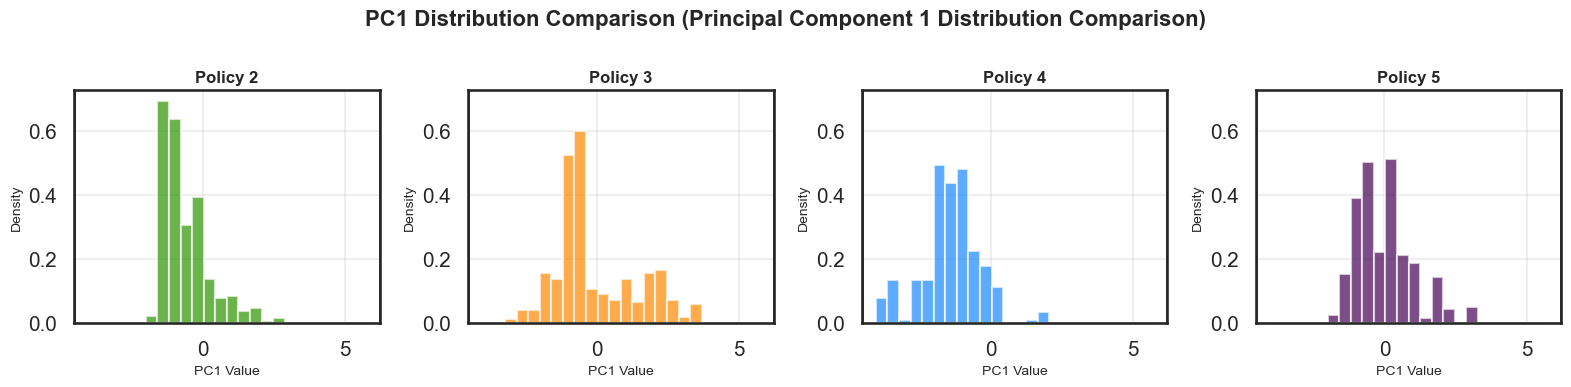

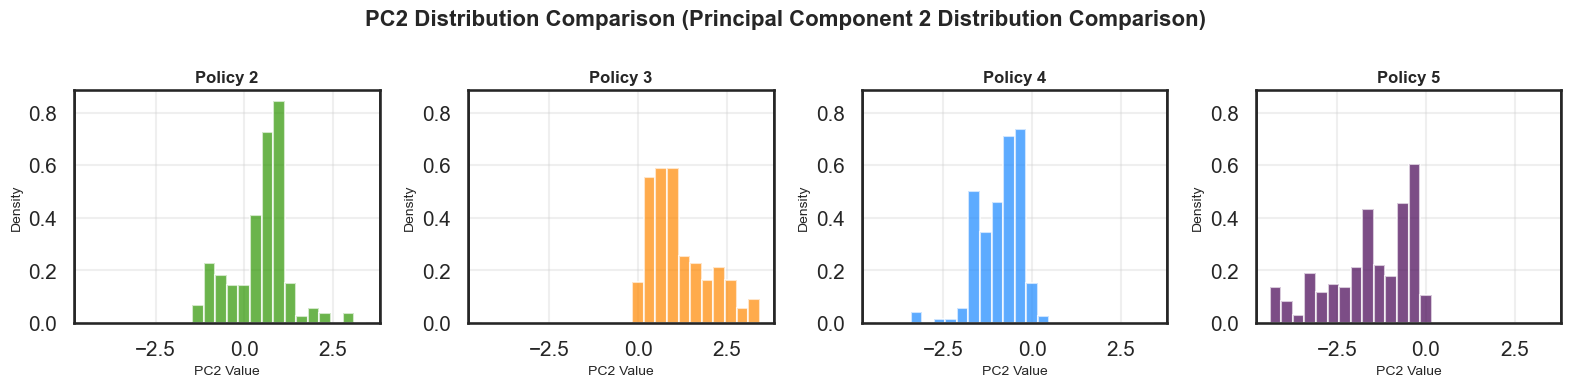

In [25]:
# Distribution plots for each policy in PC space (without baseline)
# Determine consistent bin edges and axis limits for all histograms
pc1_min, pc1_max = Z[:, 0].min(), Z[:, 0].max()
pc2_min, pc2_max = Z[:, 1].min(), Z[:, 1].max()

# Add padding for better visualisation
pc1_padding = (pc1_max - pc1_min) * 0.05
pc2_padding = (pc2_max - pc2_min) * 0.05

pc1_min_padded = pc1_min - pc1_padding
pc1_max_padded = pc1_max + pc1_padding
pc2_min_padded = pc2_min - pc2_padding
pc2_max_padded = pc2_max + pc2_padding

# Create consistent bin edges
pc1_bins = np.linspace(pc1_min, pc1_max, 25)
pc2_bins = np.linspace(pc2_min, pc2_max, 25)

# Determine consistent y-axis limits for density plots
policies = [2, 3, 4, 5]
policy_colours = ['#2C9500', '#FF8800', '#1988FF', '#440253']

# Calculate max density for PC1 across all policies
max_density_pc1 = 0
for p in policies:
    mask_policy = (best_policy == p)
    if mask_policy.sum() > 0:
        hist_vals, _ = np.histogram(Z[mask_policy, 0], bins=pc1_bins, density=True)
        max_density_pc1 = max(max_density_pc1, hist_vals.max())

# Calculate max density for PC2 across all policies
max_density_pc2 = 0
for p in policies:
    mask_policy = (best_policy == p)
    if mask_policy.sum() > 0:
        hist_vals, _ = np.histogram(Z[mask_policy, 1], bins=pc2_bins, density=True)
        max_density_pc2 = max(max_density_pc2, hist_vals.max())

# PC1 distributions with consistent bins and axis limits
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('PC1 Distribution Comparison (Principal Component 1 Distribution Comparison)', fontsize=16, fontweight='bold')

for idx, p in enumerate(policies):
    ax = axes[idx]
    
    # Get data for current policy only
    mask_policy = (best_policy == p)
    
    # PC1 distribution with consistent bins
    ax.hist(Z[mask_policy, 0], bins=pc1_bins, alpha=0.7, color=policy_colours[idx], 
           density=True, label=f'Policy {p}')
    
    # Set consistent axis limits
    ax.set_xlim(pc1_min_padded, pc1_max_padded)
    ax.set_ylim(0, max_density_pc1 * 1.05)
    
    # Add titles and labels
    ax.set_title(f'Policy {p}', fontsize=12, fontweight='bold')
    ax.set_xlabel('PC1 Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    # Add left and right edge markers for each subplot
    ax.axvline(x=ax.get_xlim()[0], color='black', linewidth=2, alpha=0.8)
    ax.axvline(x=ax.get_xlim()[1], color='black', linewidth=2, alpha=0.8)

plt.tight_layout()
plt.show()

# PC2 distributions with consistent bins and axis limits
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('PC2 Distribution Comparison (Principal Component 2 Distribution Comparison)', fontsize=16, fontweight='bold')

for idx, p in enumerate(policies):
    ax = axes[idx]
    
    # Get data for current policy only
    mask_policy = (best_policy == p)
    
    # PC2 distribution with consistent bins
    ax.hist(Z[mask_policy, 1], bins=pc2_bins, alpha=0.7, color=policy_colours[idx], 
           density=True, label=f'Policy {p}')
    
    # Set consistent axis limits
    ax.set_xlim(pc2_min_padded, pc2_max_padded)
    ax.set_ylim(0, max_density_pc2 * 1.05)
    
    # Add titles and labels
    ax.set_title(f'Policy {p}', fontsize=12, fontweight='bold')
    ax.set_xlabel('PC2 Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    # Add left and right edge markers for each subplot
    ax.axvline(x=ax.get_xlim()[0], color='black', linewidth=2, alpha=0.8)
    ax.axvline(x=ax.get_xlim()[1], color='black', linewidth=2, alpha=0.8)

plt.tight_layout()
plt.show()

#### Classification of administrative districts

Calculating administrative area potential ranking using K-means clustering...
Performing elbow method analysis to determine optimal number of clusters...


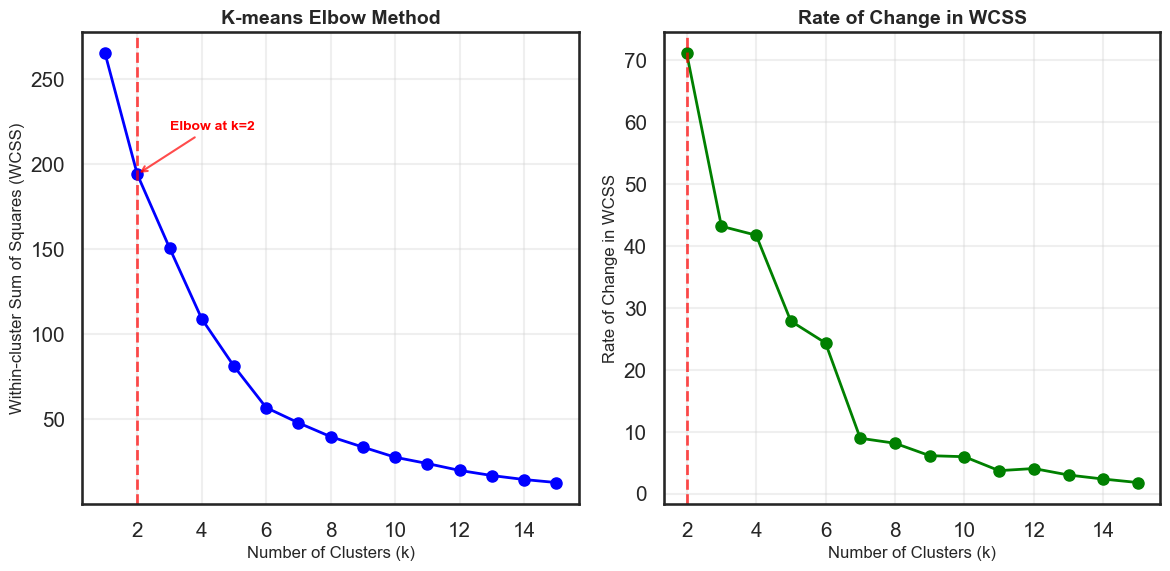


Elbow Method Analysis Results:
Suggested optimal k from elbow method: 2
WCSS values for different k:
  k=1: WCSS=265.00
  k=2: WCSS=193.86
  k=3: WCSS=150.66
  k=4: WCSS=108.91
  k=5: WCSS=81.04
  k=6: WCSS=56.70
  k=7: WCSS=47.76
  k=8: WCSS=39.62
  k=9: WCSS=33.50
  k=10: WCSS=27.54
  k=11: WCSS=23.84
  k=12: WCSS=19.79
  k=13: WCSS=16.79
  k=14: WCSS=14.44
  k=15: WCSS=12.65

Using k=6 clusters for final analysis
Applying K-means clustering with 6 clusters...

K-means Clustering Results (k=6):
Cluster 1: High Base + High Policy           :   2 areas (  3.8%)
  Average potential: 1.0992
  Average base contribution: 0.1774
  Average policy benefits: 0.9218

Cluster 2: High Base + High Policy           :   6 areas ( 11.3%)
  Average potential: 0.7688
  Average base contribution: 0.1617
  Average policy benefits: 0.6071

Cluster 3: High Base + High Policy           :   5 areas (  9.4%)
  Average potential: 0.7398
  Average base contribution: 0.2709
  Average policy benefits: 0.4689

Cl

In [26]:
# Calculate potential ranking for administrative areas using K-means clustering
if 'ucp_gdf' in locals() and 'admin_gdf' in locals():
    print("Calculating administrative area potential ranking using K-means clustering...")
    
    # Check if required columns exist
    required_columns = ['UCP_1', 'Delta-UCP_2', 
                       'Delta-UCP_3', 'Delta-UCP_4', 
                       'Delta-UCP_5']
    
    missing_columns = [col for col in required_columns if col not in ucp_gdf.columns]
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
    else:
        # Calculate potential value for each point
        ucp_gdf['potential_value'] = ucp_gdf['UCP_1'].copy()
        
        # Add positive values from optimization benefit differences
        for col in ['Delta-UCP_2', 'Delta-UCP_3', 
                   'Delta-UCP_4', 'Delta-UCP_5']:
            positive_values = ucp_gdf[col].where(ucp_gdf[col] > 0, 0)
            ucp_gdf['potential_value'] += positive_values
        
        # Aggregate potential values by administrative area
        admin_potential = []
        
        for idx, admin_row in admin_gdf.iterrows():
            # Use PLN_AREA_N instead of 'name' to match the file_context_0 pattern
            admin_name = admin_row['PLN_AREA_N']
            admin_geom = admin_row['geometry']
            
            # Find points within this administrative area
            points_in_admin = ucp_gdf[ucp_gdf.geometry.within(admin_geom)]
            
            if len(points_in_admin) > 0:
                # Calculate statistics for this administrative area (using mean values)
                mean_potential = points_in_admin['potential_value'].mean()
                max_potential = points_in_admin['potential_value'].max()
                point_count = len(points_in_admin)
                
                # Calculate average contribution from each component
                base_contribution = points_in_admin['UCP_1'].mean()
                UCP_2_contribution = points_in_admin['Delta-UCP_2'].where(
                    points_in_admin['Delta-UCP_2'] > 0, 0).mean()
                UCP_3_contribution = points_in_admin['Delta-UCP_3'].where(
                    points_in_admin['Delta-UCP_3'] > 0, 0).mean()
                UCP_4_contribution = points_in_admin['Delta-UCP_4'].where(
                    points_in_admin['Delta-UCP_4'] > 0, 0).mean()
                UCP_5_contribution = points_in_admin['Delta-UCP_5'].where(
                    points_in_admin['Delta-UCP_5'] > 0, 0).mean()
                
                admin_potential.append({
                    'admin_name': admin_name,
                    'mean_potential': mean_potential,
                    'max_potential': max_potential,
                    'point_count': point_count,
                    'base_contribution': base_contribution,
                    'UCP_2_contribution': UCP_2_contribution,
                    'UCP_3_contribution': UCP_3_contribution,
                    'UCP_4_contribution': UCP_4_contribution,
                    'UCP_5_contribution': UCP_5_contribution,
                    'geometry': admin_geom
                })
        
        # Convert to DataFrame and sort by mean potential first
        admin_potential_df = pd.DataFrame(admin_potential)
        admin_potential_df = admin_potential_df.sort_values('mean_potential', ascending=False)
        
        # Prepare features for K-means clustering
        feature_columns = ['base_contribution', 'UCP_2_contribution', 'UCP_3_contribution', 
                          'UCP_4_contribution', 'UCP_5_contribution']
        
        # Create feature matrix for clustering
        X = admin_potential_df[feature_columns].values
        
        # Standardize features for K-means
        from sklearn.preprocessing import StandardScaler
        from sklearn.cluster import KMeans
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Elbow method to determine optimal number of clusters
        print("Performing elbow method analysis to determine optimal number of clusters...")
        
        max_k = min(15, len(admin_potential_df))  # Maximum k should not exceed number of areas
        k_range = range(1, max_k + 1)
        inertias = []
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            inertias.append(kmeans.inertia_)
        
        # Plot elbow curve
        plt.figure(figsize=(12, 6))
        
        # Subplot 1: Elbow curve
        plt.subplot(1, 2, 1)
        plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Number of Clusters (k)', fontsize=12)
        plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
        plt.title('K-means Elbow Method', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Calculate elbow point using the "elbow" method (rate of change)
        if len(inertias) >= 3:
            # Calculate second derivative to find elbow
            second_derivatives = []
            for i in range(1, len(inertias) - 1):
                second_deriv = inertias[i-1] - 2*inertias[i] + inertias[i+1]
                second_derivatives.append(second_deriv)
            
            # Find the point with maximum second derivative (most curved point)
            if second_derivatives:
                elbow_idx = second_derivatives.index(max(second_derivatives)) + 1
                optimal_k_elbow = k_range[elbow_idx]
                plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7, linewidth=2)
                plt.annotate(f'Elbow at k={optimal_k_elbow}', 
                           xy=(optimal_k_elbow, inertias[elbow_idx]), 
                           xytext=(optimal_k_elbow + 1, inertias[elbow_idx] + max(inertias)*0.1),
                           arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                           fontsize=10, fontweight='bold', color='red')
            else:
                optimal_k_elbow = 3  # Default fallback
        else:
            optimal_k_elbow = 3  # Default fallback
        
        # Subplot 2: Rate of change (first derivative)
        plt.subplot(1, 2, 2)
        if len(inertias) >= 2:
            rate_of_change = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
            plt.plot(k_range[1:], rate_of_change, 'go-', linewidth=2, markersize=8)
            plt.xlabel('Number of Clusters (k)', fontsize=12)
            plt.ylabel('Rate of Change in WCSS', fontsize=12)
            plt.title('Rate of Change in WCSS', fontsize=14, fontweight='bold')
            plt.grid(True, alpha=0.3)
            
            # Highlight the elbow point
            if optimal_k_elbow <= len(rate_of_change):
                plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7, linewidth=2)
        
        plt.tight_layout()
        plt.savefig('kmeans_elbow_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print elbow analysis results
        print(f"\nElbow Method Analysis Results:")
        print("="*50)
        print(f"Suggested optimal k from elbow method: {optimal_k_elbow}")
        print(f"WCSS values for different k:")
        for k, inertia in zip(k_range, inertias):
            print(f"  k={k}: WCSS={inertia:.2f}")
        
        # Manual control for number of clusters (can override elbow method result)
        MANUAL_K = 6  # Use elbow method result as default, but can be manually changed
        print(f"\nUsing k={MANUAL_K} clusters for final analysis")
        
        # Use the determined optimal number of clusters
        optimal_k = min(MANUAL_K, len(admin_potential_df))  # Ensure k doesn't exceed number of areas
        
        print(f"Applying K-means clustering with {optimal_k} clusters...")
        
        # Apply K-means clustering with optimal k
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        # Add cluster labels to dataframe
        admin_potential_df['cluster'] = cluster_labels
        
        # Calculate cluster centers in original scale
        cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
        
        # Analyze clusters and assign meaningful names
        cluster_info = {}
        for i in range(optimal_k):
            cluster_data = admin_potential_df[admin_potential_df['cluster'] == i]
            cluster_center = cluster_centers[i]
            
            # Calculate cluster characteristics
            avg_base = cluster_center[0]
            avg_policy_sum = sum(cluster_center[1:5])
            avg_potential = cluster_data['mean_potential'].mean()
            
            # Determine cluster name based on characteristics
            base_level = 'High' if avg_base > np.mean(admin_potential_df['base_contribution']) else 'Low'
            policy_level = 'High' if avg_policy_sum > np.mean(admin_potential_df[['UCP_2_contribution', 'UCP_3_contribution', 'UCP_4_contribution', 'UCP_5_contribution']].sum(axis=1)) else 'Low'
            
            cluster_name = f"{base_level} Base + {policy_level} Policy"
            
            cluster_info[i] = {
                'name': cluster_name,
                'count': len(cluster_data),
                'avg_potential': avg_potential,
                'avg_base': avg_base,
                'avg_policy_sum': avg_policy_sum,
                'center': cluster_center
            }
        
        # Sort clusters by average mean potential (highest to lowest)
        sorted_clusters = sorted(cluster_info.items(), key=lambda x: x[1]['avg_potential'], reverse=True)
        
        # Create cluster name mapping
        cluster_name_mapping = {}
        cluster_colors = {}
        color_palette = ['#8B0000', '#DC143C', '#FF6347', '#FF8C00', '#FFD700', '#32CD32', '#90EE90', '#E0E0E0', '#D3D3D3']
        
        for rank, (cluster_id, info) in enumerate(sorted_clusters):
            cluster_name_mapping[cluster_id] = f"Cluster {rank+1}: {info['name']}"
            cluster_colors[cluster_id] = color_palette[rank % len(color_palette)]
        
        # Apply cluster names
        admin_potential_df['classification'] = admin_potential_df['cluster'].map(cluster_name_mapping)
        
        # Create separate ranking within each cluster (by mean potential value)
        cluster_rankings = {}
        for cluster_id in range(optimal_k):
            cluster_data = admin_potential_df[admin_potential_df['cluster'] == cluster_id].copy()
            cluster_data = cluster_data.sort_values('mean_potential', ascending=False)
            cluster_data['class_rank'] = range(1, len(cluster_data) + 1)
            cluster_rankings[cluster_id] = cluster_data
        
        # Combine all clusters back into one dataframe with class rankings
        admin_potential_ranked = pd.concat(cluster_rankings.values(), ignore_index=True)
        admin_potential_ranked = admin_potential_ranked.sort_values('mean_potential', ascending=False)
        admin_potential_ranked['overall_rank'] = range(1, len(admin_potential_ranked) + 1)
        
        # Create GeoDataFrame for visualization
        admin_potential_gdf = gpd.GeoDataFrame(admin_potential_ranked, geometry='geometry')
        
        # Print K-means clustering results
        print(f"\nK-means Clustering Results (k={optimal_k}):")
        print("="*80)
        for rank, (cluster_id, info) in enumerate(sorted_clusters):
            cluster_name = cluster_name_mapping[cluster_id]
            percentage = (info['count'] / len(admin_potential_ranked)) * 100
            print(f"{cluster_name:<45}: {info['count']:>3} areas ({percentage:>5.1f}%)")
            print(f"  Average potential: {info['avg_potential']:.4f}")
            print(f"  Average base contribution: {info['avg_base']:.4f}")
            print(f"  Average policy benefits: {info['avg_policy_sum']:.4f}")
            print()
        
        # Print unified ranking table with separate rankings by cluster (by mean potential within cluster)
        print(f"\nUnified Administrative Area Ranking Table (K-means Clusters, k={optimal_k}, Ranked by Mean Potential within Cluster):")
        print("="*160)
        print(f"{'Overall':<8} {'Class':<6} {'Cluster Classification':<45} {'Admin Area':<25} {'Base Contrib':<15} {'Mean Potential':<15} {'Max Potential':<15} {'Points':<8} {'U2':<8} {'U3':<8} {'U4':<8} {'U5':<8}")
        print(f"{'Rank':<8} {'Rank':<6} {'':<45} {'':<25} {'':<15} {'':<15} {'':<15} {'':<8} {'':<8} {'':<8} {'':<8} {'':<8}")
        print("="*160)
        
        # Sort by cluster priority (based on average mean potential) and then by class rank within each cluster
        cluster_priority = {cluster_id: rank for rank, (cluster_id, info) in enumerate(sorted_clusters)}
        admin_potential_ranked['cluster_priority'] = admin_potential_ranked['cluster'].map(cluster_priority)
        admin_potential_display = admin_potential_ranked.sort_values(['cluster_priority', 'class_rank'])
        
        current_cluster = None
        for idx, row in admin_potential_display.iterrows():
            # Add separator line when cluster changes
            if current_cluster != row['cluster']:
                if current_cluster is not None:
                    print("-" * 160)
                current_cluster = row['cluster']
            
            print(f"{row['overall_rank']:<8} {row['class_rank']:<6} {row['classification']:<45} {row['admin_name']:<25} "
                  f"{row['base_contribution']:<15.4f} {row['mean_potential']:<15.4f} {row['max_potential']:<15.4f} {row['point_count']:<8} "
                  f"{row['UCP_2_contribution']:<8.4f} {row['UCP_3_contribution']:<8.4f} "
                  f"{row['UCP_4_contribution']:<8.4f} {row['UCP_5_contribution']:<8.4f}")

/var/folders/f4/33sk92_n60j6tssngt9ntw3m0000gn/T/ipykernel_14419/2336258007.py:45: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Creating K-means cluster spatial distribution mapping...
Cluster colour mapping:
  Type 1: #FFCC69 (Average potential: 1.0992)
  Type 2: #68BDFF (Average potential: 0.7688)
  Type 3: #C66BFF (Average potential: 0.7398)
  Type 4: #707070 (Average potential: 0.6837)
  Type 5: #5FCC40 (Average potential: 0.3011)
  Type 6: #B0B0B0 (Average potential: 0.1284)


/var/folders/f4/33sk92_n60j6tssngt9ntw3m0000gn/T/ipykernel_14419/2336258007.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')
/var/folders/f4/33sk92_n60j6tssngt9ntw3m0000gn/T/ipykernel_14419/2336258007.py:100: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Creating mean potential 5-level classification mapping...
Mean potential level classification:
  Level 1: 0.0-0.2 (Lowest potential)
  Level 2: 0.2-0.4 (Low potential)
  Level 3: 0.4-0.6 (Medium potential)
  Level 4: 0.6-0.8 (High potential)
  Level 5: 0.8-1.0 (Highest potential)


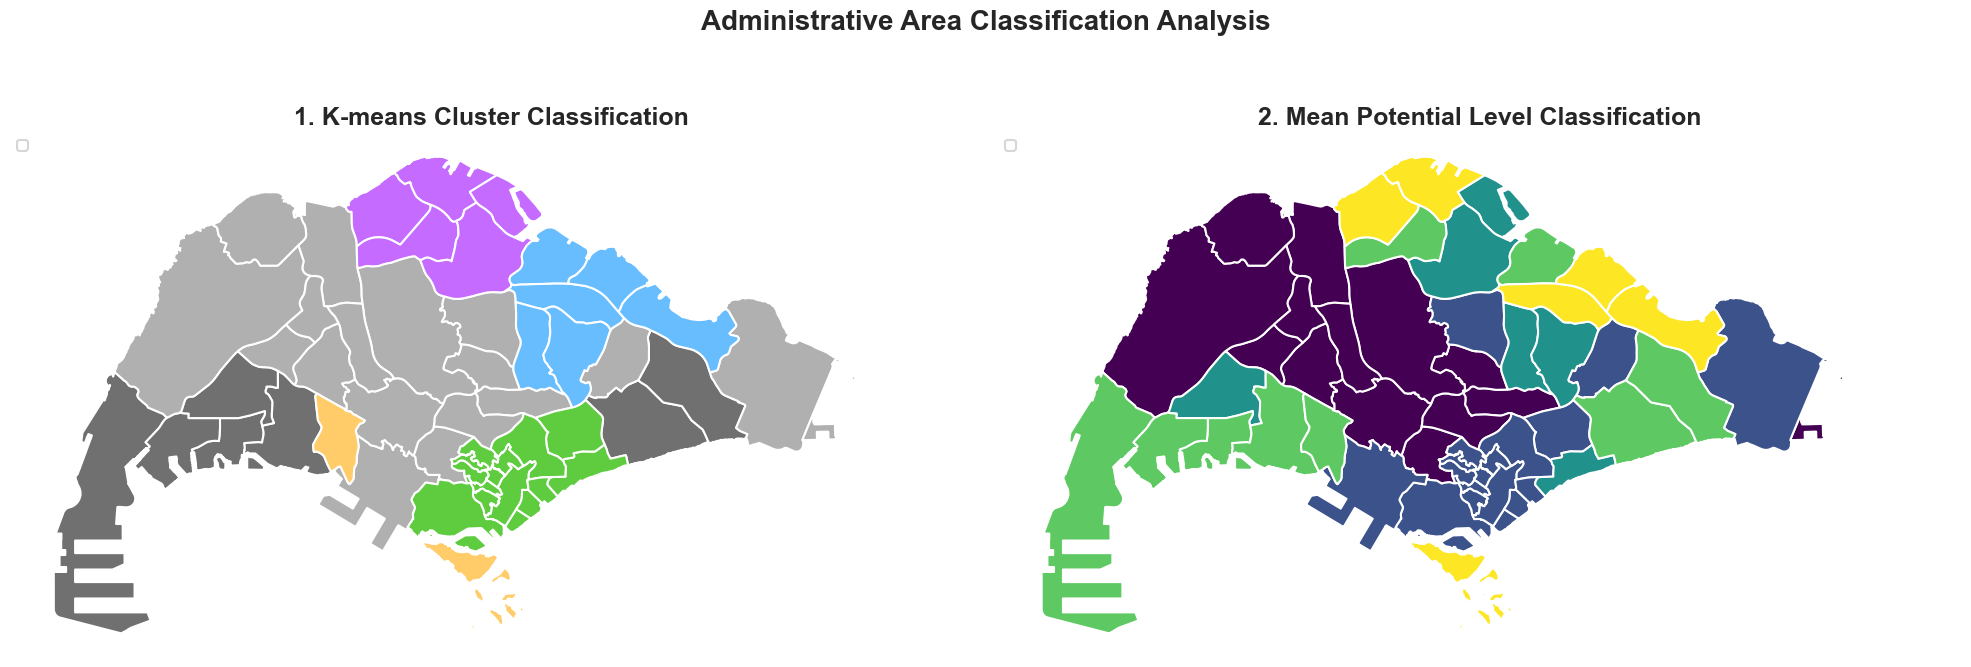

Creating cluster_and_level_distribution_pie_charts.png
Cluster distribution proportions:
  Type 1: 2 areas (3.8%)
  Type 2: 6 areas (11.3%)
  Type 3: 5 areas (9.4%)
  Type 4: 7 areas (13.2%)
  Type 5: 15 areas (28.3%)
  Type 6: 18 areas (34.0%)

Potential level distribution proportions:
  Level 1: 14 areas (26.4%)
  Level 2: 18 areas (34.0%)
  Level 3: 6 areas (11.3%)
  Level 4: 9 areas (17.0%)
  Level 5: 6 areas (11.3%)


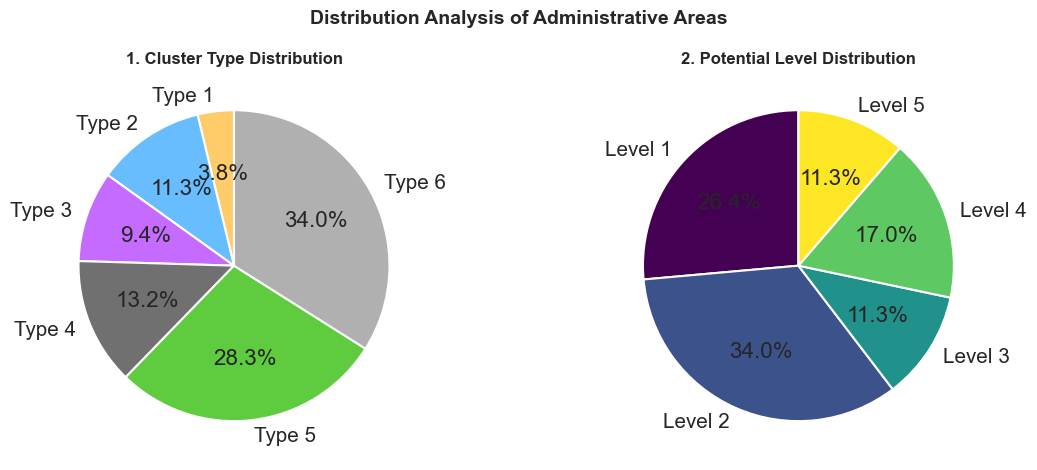

Creating stacked bar chart mapping for policy contributions...
Policy contribution colour mapping:
  Base contribution: Grey (baseline values)
  UCP_2 contribution: #29BB00 (Green - UCP_2 benefits)
  UCP_3 contribution: #FFBC37 (Orange - UCP_3 benefits)
  UCP_4 contribution: #35A7FF (Blue - UCP_4 benefits)
  UCP_5 contribution: #B339FF (Purple - UCP_5 benefits)
Y-axis range: 0-2 (total potential value)


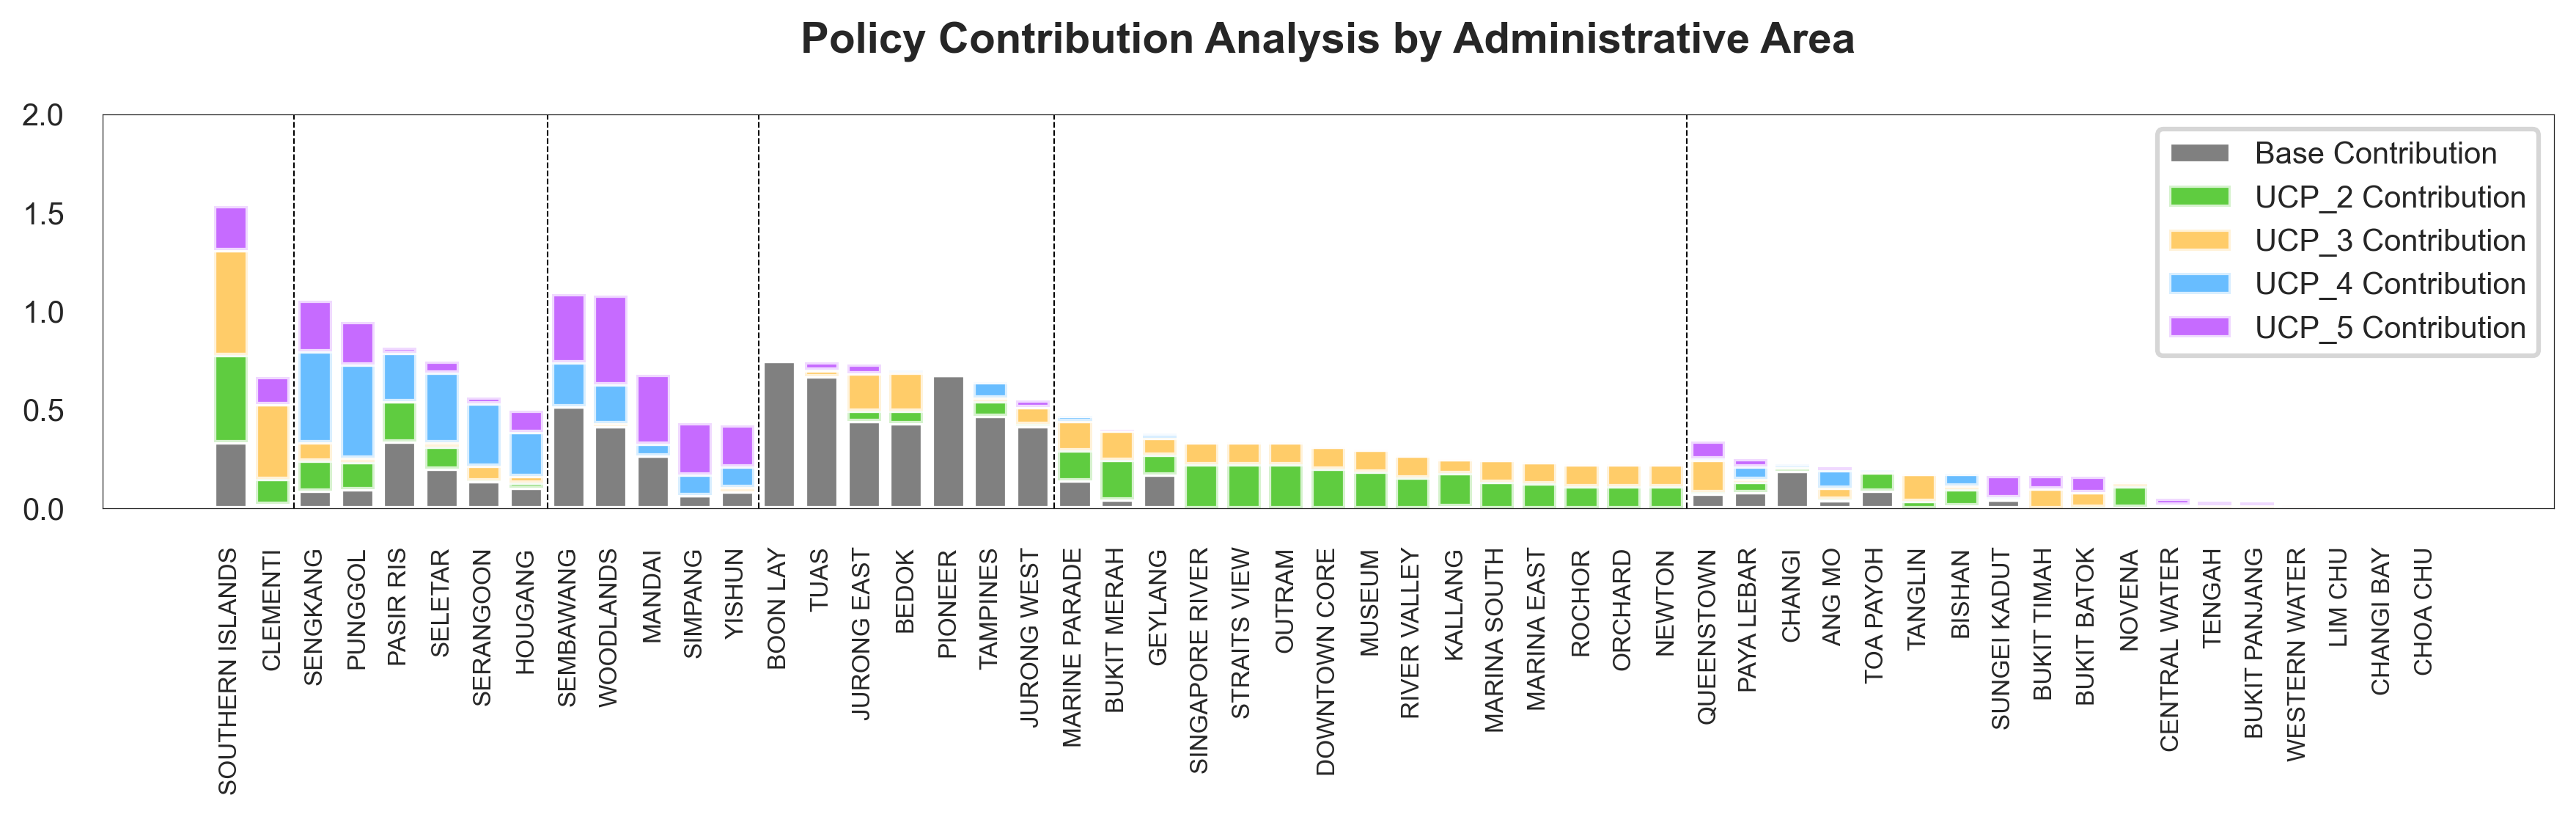

Creating policy_composition_by_cluster_type_pie_charts.png
Type 1 policy composition proportions:
  Base contribution: 16.1%
  UCP_2 contribution: 26.1%
  UCP_3 contribution: 41.3%
  UCP_4 contribution: 0.0%
  UCP_5 contribution: 16.5%

Type 2 policy composition proportions:
  Base contribution: 21.0%
  UCP_2 contribution: 13.7%
  UCP_3 contribution: 5.2%
  UCP_4 contribution: 45.1%
  UCP_5 contribution: 14.9%

Type 3 policy composition proportions:
  Base contribution: 36.6%
  UCP_2 contribution: 0.0%
  UCP_3 contribution: 1.0%
  UCP_4 contribution: 18.6%
  UCP_5 contribution: 43.8%

Type 4 policy composition proportions:
  Base contribution: 80.6%
  UCP_2 contribution: 4.2%
  UCP_3 contribution: 10.8%
  UCP_4 contribution: 1.9%
  UCP_5 contribution: 2.5%

Type 5 policy composition proportions:
  Base contribution: 8.2%
  UCP_2 contribution: 53.6%
  UCP_3 contribution: 37.1%
  UCP_4 contribution: 1.0%
  UCP_5 contribution: 0.1%

Type 6 policy composition proportions:
  Base contributi

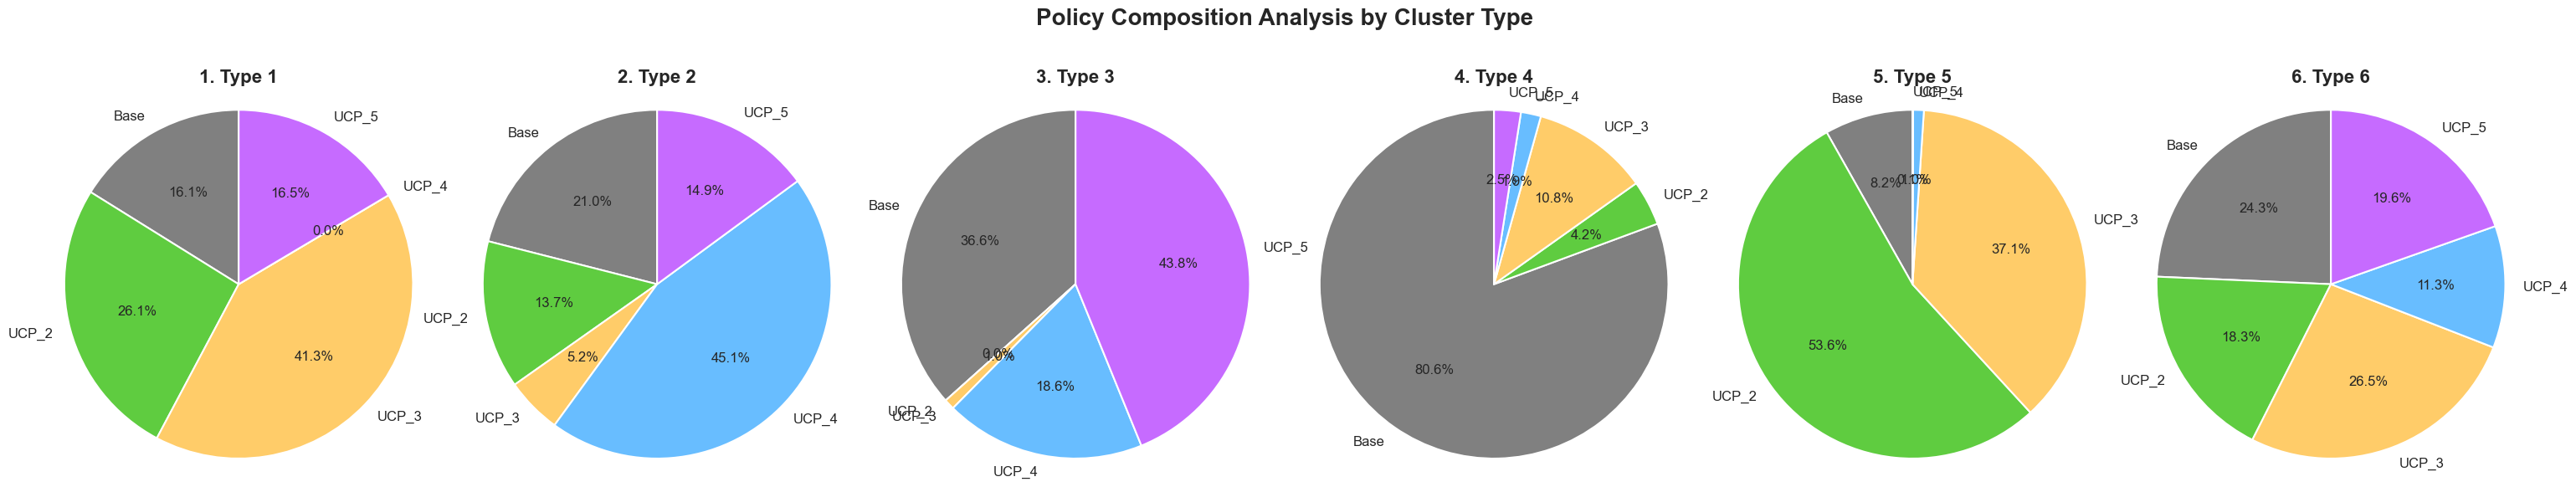

In [31]:
# Create visualisations

# Define custom colours for 6 K-means clusters with clear mapping
# Map cluster IDs to colours based on their ranking (sorted by average mean potential)
cluster_colour_mapping = {}
cluster_colours = ['#FFCC69', '#68BDFF', '#C66BFF', '#707070', '#5FCC40', '#B0B0B0']  # Red, Teal, Blue, Green, Yellow, Plum

# Create simplified cluster name mapping (Type 1-6 based on ranking)
cluster_type_mapping = {}
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    cluster_type_mapping[cluster_id] = rank + 1  # Save as number for convenience

# Add cluster type information to admin_potential_gdf
admin_potential_gdf['cluster_type'] = admin_potential_gdf['cluster'].map(cluster_type_mapping)

# Create colour mapping based on cluster ranking (highest potential gets first colour)
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    if rank < len(cluster_colours):
        cluster_colour_mapping[cluster_id] = cluster_colours[rank]
    else:
        cluster_colour_mapping[cluster_id] = '#CCCCCC'  # Default grey for extra clusters

print("Creating K-means cluster spatial distribution mapping...")
print("Cluster colour mapping:")
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    cluster_name = f"Type {cluster_type_mapping[cluster_id]}"
    colour = cluster_colour_mapping.get(cluster_id, '#CCCCCC')
    print(f"  {cluster_name}: {colour} (Average potential: {info['avg_potential']:.4f})")

# Figure 1: K-means clustering mapping
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot cluster map with mapped colours
for cluster_id in range(optimal_k):
    cluster_data = admin_potential_gdf[admin_potential_gdf['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        cluster_name = f"Type {cluster_type_mapping[cluster_id]}"
        cluster_data.plot(color=cluster_colour_mapping.get(cluster_id, '#CCCCCC'), 
                            ax=ax1,
                            edgecolor='white',
                            linewidth=1.5,
                            label=cluster_name)

# Add legend for cluster map
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)

# Remove grid, spines, axes, and title for ax1
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_title('1. K-means Cluster Classification', fontsize=18, fontweight='bold')

print("Creating mean potential 5-level classification mapping...")
print("Mean potential level classification:")
print("  Level 1: 0.0-0.2 (Lowest potential)")
print("  Level 2: 0.2-0.4 (Low potential)")
print("  Level 3: 0.4-0.6 (Medium potential)")
print("  Level 4: 0.6-0.8 (High potential)")
print("  Level 5: 0.8-1.0 (Highest potential)")

# Plot mean potential ranking map with viridis colourmap and 5 levels
# Use 0-1 range divided into 5 equal parts
vmin = 0
vmax = 1

# Create 5 equal levels from 0 to 1
levels = 5
level_boundaries = [0.2, 0.4, 0.6, 0.8, 1.0]  # 5 equal divisions of 0-1 range

# Classify each area into one of 5 levels based on 0-1 range
def classify_potential(value):
    for i, boundary in enumerate(level_boundaries):
        if value <= boundary:
            return i + 1
    return 5

admin_potential_gdf['potential_level'] = admin_potential_gdf['mean_potential'].apply(classify_potential)

# Create discrete colourmap for 5 levels using viridis colours
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
viridis = cm.get_cmap('viridis')
level_colours = [viridis(i/4) for i in range(5)]  # Get 5 evenly spaced colours from viridis (0, 0.25, 0.5, 0.75, 1.0)
level_cmap = ListedColormap(level_colours)

# Plot each level separately to create legend
for level in range(1, 6):
    level_data = admin_potential_gdf[admin_potential_gdf['potential_level'] == level]
    if len(level_data) > 0:
        level_data.plot(color=level_colours[level-1], 
                       ax=ax2,
                       edgecolor='white',
                       linewidth=1.5,
                       label=f'Level {level}')

# Add legend for potential level map
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)

# Remove grid, spines, axes, and title for ax2
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_title('2. Mean Potential Level Classification', fontsize=18, fontweight='bold')

# Add main title for the entire figure
fig1.suptitle('Administrative Area Classification Analysis', fontsize=20, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

# Print image name and proportions
print("Creating cluster_and_level_distribution_pie_charts.png")
print("Cluster distribution proportions:")
# Print cluster proportions in Type 1-6 order (based on ranking)
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    cluster_name = f"Type {cluster_type_mapping[cluster_id]}"
    count = info['count']
    percentage = (count / len(admin_potential_gdf)) * 100
    print(f"  {cluster_name}: {count} areas ({percentage:.1f}%)")

print("\nPotential level distribution proportions:")
level_counts = admin_potential_gdf['potential_level'].value_counts().sort_index()
for level_id, count in level_counts.items():
    percentage = (count / len(admin_potential_gdf)) * 100
    print(f"  Level {level_id}: {count} areas ({percentage:.1f}%)")

# Create two pie charts showing cluster and level distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1: Cluster distribution
# Create ordered data based on cluster ranking (sorted_clusters order)
cluster_pie_data = []
cluster_pie_colours = []
cluster_pie_labels = []

for rank, (cluster_id, info) in enumerate(sorted_clusters):
    count = info['count']
    cluster_pie_data.append(count)
    cluster_pie_colours.append(cluster_colour_mapping.get(cluster_id, '#CCCCCC'))
    cluster_pie_labels.append(f"Type {cluster_type_mapping[cluster_id]}")

ax1.pie(cluster_pie_data, colors=cluster_pie_colours, labels=cluster_pie_labels, startangle=90, autopct='%1.1f%%')
ax1.set_title('1. Cluster Type Distribution', fontsize=12, fontweight='bold')

# Pie chart 2: Potential level distribution
level_pie_colours = [level_cmap(i-1) for i in level_counts.index]  # Use level colourmap (adjust for 0-based indexing)
level_pie_labels = [f'Level {i}' for i in level_counts.index]

ax2.pie(level_counts.values, colors=level_pie_colours, labels=level_pie_labels, startangle=90, autopct='%1.1f%%')
ax2.set_title('2. Potential Level Distribution', fontsize=12, fontweight='bold')

# Add main title for the pie charts
fig.suptitle('Distribution Analysis of Administrative Areas', fontsize=14, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()


print("Creating stacked bar chart mapping for policy contributions...")
print("Policy contribution colour mapping:")
print("  Base contribution: Grey (baseline values)")
print("  UCP_2 contribution: #29BB00 (Green - UCP_2 benefits)")
print("  UCP_3 contribution: #FFBC37 (Orange - UCP_3 benefits)")
print("  UCP_4 contribution: #35A7FF (Blue - UCP_4 benefits)")
print("  UCP_5 contribution: #B339FF (Purple - UCP_5 benefits)")
print("Y-axis range: 0-2 (total potential value)")

# Figure 2: Create stacked bar chart visualisation
plt.figure(figsize=(12, 4), dpi=300)

# Sort admin_potential_display by cluster and mean potential within each cluster
# First get cluster data sorted by mean potential (descending for high potential clusters)
cluster_data_sorted = []
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    cluster_areas = admin_potential_ranked[admin_potential_ranked['cluster'] == cluster_id]
    cluster_areas_sorted = cluster_areas.sort_values('mean_potential', ascending=False)
    cluster_data_sorted.append(cluster_areas_sorted)

# Concatenate all sorted cluster dataframes
sorted_admin_potential = pd.concat(cluster_data_sorted)

# Define consistent policy colours for both bar chart and pie charts with transparency
policy_colours = ['grey', '#29BB00', '#FFBC37', '#35A7FF', '#B339FF']  # Base, UCP_2, UCP_3, UCP_4, UCP_5

# Plot the base_contribution at the bottom
bars = plt.bar(sorted_admin_potential['admin_name'], 
               sorted_admin_potential['base_contribution'],
               color=policy_colours[0], label='Base Contribution')

# Initialise bottom for stacking
bottom = sorted_admin_potential['base_contribution'].values.copy()

# Plot each policy contribution as a stacked bar with transparency
policy_columns = ['UCP_2_contribution', 'UCP_3_contribution', 'UCP_4_contribution', 'UCP_5_contribution']
policy_labels = ['UCP_2 Contribution', 'UCP_3 Contribution', 'UCP_4 Contribution', 'UCP_5 Contribution']

for i, col in enumerate(policy_columns):
    plt.bar(sorted_admin_potential['admin_name'], 
            sorted_admin_potential[col],
            bottom=bottom, color=policy_colours[i+1], 
            label=policy_labels[i], alpha=0.75)
    bottom += sorted_admin_potential[col]

# Add vertical lines to separate clusters
current_pos = 0
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    if rank > 0:  # Don't add line before first cluster
        plt.axvline(x=current_pos - 0.5, color='black', linestyle='--', linewidth=0.5)
    current_pos += info['count']

# Add legend for policy contributions
plt.legend(loc='upper right', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.ylim(0, 2)  # Set y-axis range from 0 to 1.8
plt.gca().spines['top'].set_linewidth(0.3)
plt.gca().spines['right'].set_linewidth(0.3)
plt.gca().spines['left'].set_linewidth(0.3)
plt.gca().spines['bottom'].set_linewidth(0.3)

# Add title for the stacked bar chart
plt.title('Policy Contribution Analysis by Administrative Area', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Create pie charts showing policy composition for each cluster type
print("Creating policy_composition_by_cluster_type_pie_charts.png")

# Calculate average policy contributions for each cluster type
cluster_policy_composition = {}
for rank, (cluster_id, info) in enumerate(sorted_clusters):
    cluster_name = f"Type {cluster_type_mapping[cluster_id]}"
    cluster_data = admin_potential_ranked[admin_potential_ranked['cluster'] == cluster_id]
    
    # Calculate average contributions for this cluster
    avg_base = cluster_data['base_contribution'].mean()
    avg_UCP_2 = cluster_data['UCP_2_contribution'].mean()
    avg_UCP_3 = cluster_data['UCP_3_contribution'].mean()
    avg_UCP_4 = cluster_data['UCP_4_contribution'].mean()
    avg_UCP_5 = cluster_data['UCP_5_contribution'].mean()
    
    total_avg = avg_base + avg_UCP_2 + avg_UCP_3 + avg_UCP_4 + avg_UCP_5
    
    # Calculate proportions
    cluster_policy_composition[cluster_name] = {
        'base': avg_base / total_avg * 100,
        'UCP_2': avg_UCP_2 / total_avg * 100,
        'UCP_3': avg_UCP_3 / total_avg * 100,
        'UCP_4': avg_UCP_4 / total_avg * 100,
        'UCP_5': avg_UCP_5 / total_avg * 100
    }
    
    print(f"{cluster_name} policy composition proportions:")
    print(f"  Base contribution: {avg_base / total_avg * 100:.1f}%")
    print(f"  UCP_2 contribution: {avg_UCP_2 / total_avg * 100:.1f}%")
    print(f"  UCP_3 contribution: {avg_UCP_3 / total_avg * 100:.1f}%")
    print(f"  UCP_4 contribution: {avg_UCP_4 / total_avg * 100:.1f}%")
    print(f"  UCP_5 contribution: {avg_UCP_5 / total_avg * 100:.1f}%")
    print()

# Create figure with 6 pie charts in one row with no spacing
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
plt.subplots_adjust(wspace=0, hspace=0)  # Remove all spacing between pie charts

# Convert colours to RGBA format with transparency for pie charts
import matplotlib.colors as mcolours

def hex_to_rgba(hex_colour, alpha=0.75):
    """Convert hex colour to RGBA with specified alpha"""
    rgb = mcolours.hex2color(hex_colour)
    return (*rgb, alpha)

# Create transparent policy colours for pie charts
policy_colours_transparent = [
    policy_colours[0],  # Keep grey solid for base contribution
    hex_to_rgba(policy_colours[1], 0.75),  # UCP_2 with transparency
    hex_to_rgba(policy_colours[2], 0.75),  # UCP_3 with transparency
    hex_to_rgba(policy_colours[3], 0.75),  # UCP_4 with transparency
    hex_to_rgba(policy_colours[4], 0.75)   # UCP_5 with transparency
]

# Create pie chart for each cluster type using consistent policy colours with transparency
for i, (cluster_name, composition) in enumerate(cluster_policy_composition.items()):
    values = [composition['base'], composition['UCP_2'], composition['UCP_3'], 
              composition['UCP_4'], composition['UCP_5']]
    labels = ['Base', 'UCP_2', 'UCP_3', 'UCP_4', 'UCP_5']
    
    axes[i].pie(values, colors=policy_colours_transparent, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
    axes[i].set_title(f'{i+1}. {cluster_name}', fontsize=16, fontweight='bold', pad=15)  # Add numbered subtitle
    axes[i].axis('equal')  # Ensure pie charts are circular
    
    # Remove axis margins to make pie charts touch
    axes[i].set_xlim(-1.2, 1.2)
    axes[i].set_ylim(-1.2, 1.2)

# Add main title for the policy composition pie charts
fig.suptitle('Policy Composition Analysis by Cluster Type', fontsize=20, fontweight='bold', y=1.1)

# Remove padding around the entire figure
plt.subplots_adjust(left=0, right=1, top=0.88, bottom=0, wspace=0, hspace=0)
plt.show()


Found optimisation benefit difference columns: ['Delta-UCP_2', 'Delta-UCP_3', 'Delta-UCP_4', 'Delta-UCP_5']

DELTA-UCP_2 vs DELTA-UCP_3 — n=53 | Pearson r=0.616 (p=8.95e-07), Spearman ρ=0.611 (p=1.18e-06)

DELTA-UCP_2 vs DELTA-UCP_4 — n=53 | Pearson r=0.081 (p=0.564), Spearman ρ=0.000 (p=0.999)

DELTA-UCP_2 vs DELTA-UCP_5 — n=53 | Pearson r=-0.024 (p=0.864), Spearman ρ=-0.105 (p=0.455)

DELTA-UCP_3 vs DELTA-UCP_4 — n=53 | Pearson r=-0.270 (p=0.0508), Spearman ρ=-0.301 (p=0.0285)

DELTA-UCP_3 vs DELTA-UCP_5 — n=53 | Pearson r=-0.001 (p=0.992), Spearman ρ=-0.030 (p=0.829)

DELTA-UCP_4 vs DELTA-UCP_5 — n=53 | Pearson r=0.486 (p=0.000227), Spearman ρ=0.525 (p=5.5e-05)


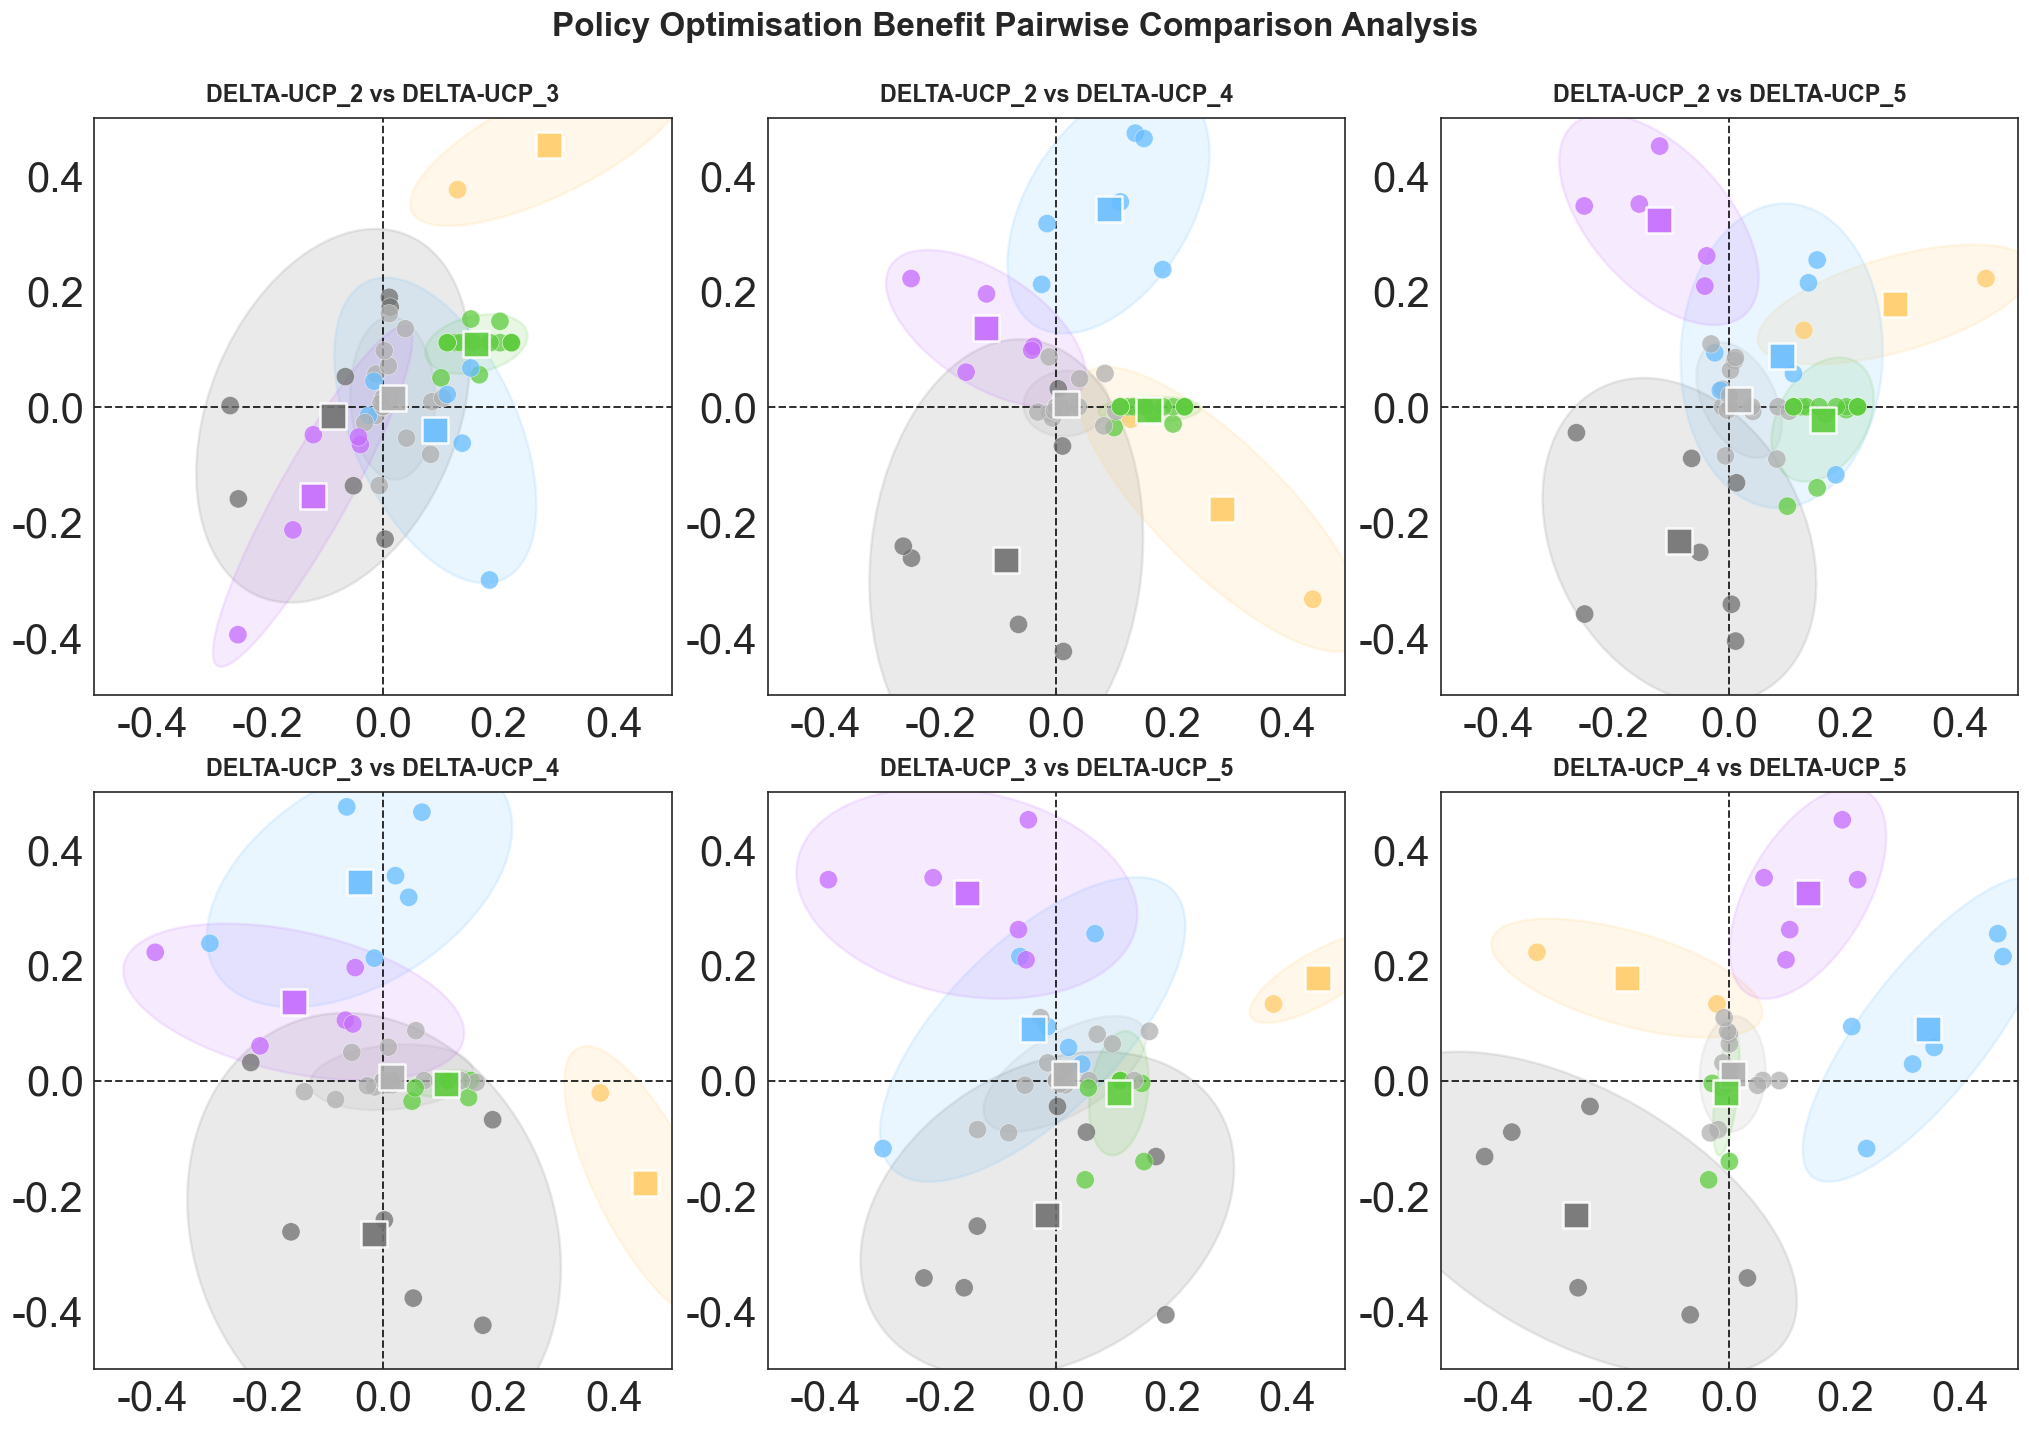

Creating polished correlation matrix across policies...


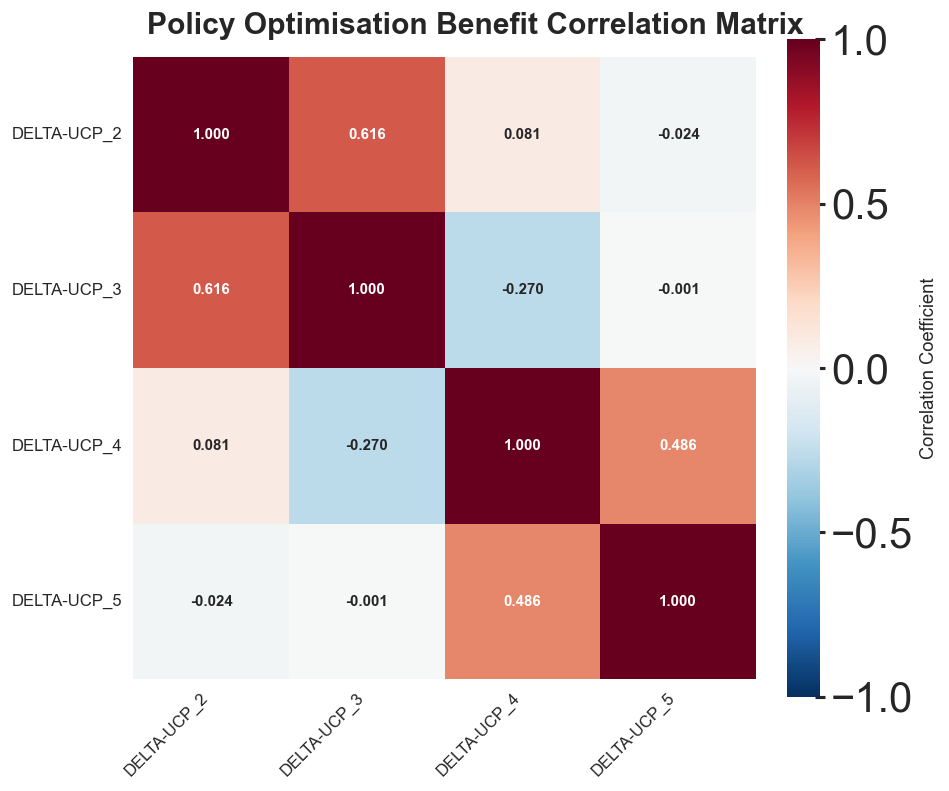

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

sns.set_theme(context="talk", style="white")
plt.rcParams.update({
    "figure.dpi": 120,                 # Canvas DPI (export DPI set in savefig)
    "savefig.dpi": 600,               # Export DPI for PNG
    "axes.spines.top": True,          # Show top spine
    "axes.spines.right": True,        # Show right spine
    "axes.spines.bottom": True,
    "axes.spines.left": True,
    "axes.linewidth": 1.0,
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.major.size": 6,            # Show x-axis tick marks
    "xtick.minor.size": 3,            # Show minor x-axis tick marks
    "ytick.major.size": 6,            # Show y-axis tick marks
    "ytick.minor.size": 3,            # Show minor y-axis tick marks
    "xtick.direction": "inout",       # Tick direction
    "ytick.direction": "inout",       # Tick direction
    "legend.frameon": True,
    "legend.framealpha": 0.85,
    "legend.facecolor": "white",
    "pdf.fonttype": 42,               # Embed TrueType fonts in PDF
    "ps.fonttype": 42,
    "svg.fonttype": "none"            # Keep text as text in SVG
})

# Use widely available fonts, avoiding Liberation Sans
plt.rcParams["font.family"] = ["Arial", "DejaVu Sans", "Helvetica", "sans-serif"]

# Custom colour palette for cluster types
cluster_type_colours = {
    1: "#FFCC69",  # Type 1: yellow-orange
    2: "#68BDFF",  # Type 2: light blue
    3: "#C66BFF",  # Type 3: purple
    4: "#707070",  # Type 4: dark grey
    5: "#5FCC40",  # Type 5: green
    6: "#B0B0B0"   # Type 6: light grey
}

# -------------------------------------
# Safety checks for required data
# -------------------------------------
if 'ucp_gdf' in locals() or 'ucp_gdf' in globals():
    optimisation_benefit_diff_columns = [col for col in ucp_gdf.columns if col.startswith('Delta-UCP')]

    if optimisation_benefit_diff_columns and 'admin_gdf' in locals() and 'admin_potential_gdf' in locals():
        print(f"Found optimisation benefit difference columns: {optimisation_benefit_diff_columns}")

        # ----------------------------------------------------------------
        # Compute mean diffs by admin and collect area/cluster attributes
        # ----------------------------------------------------------------
        admin_diff_data = {}

        for diff_col in optimisation_benefit_diff_columns:
            policy_name = diff_col
            admin_diff_data[policy_name] = {}

            for idx, admin_area in admin_gdf.iterrows():
                within_mask = ucp_gdf.geometry.within(admin_area.geometry)
                points_in_area = ucp_gdf[within_mask]

                if len(points_in_area) > 0:
                    mean_diff = float(points_in_area[diff_col].mean())
                    admin_name = admin_area.get('PLN_AREA_N', f"Area_{idx}")

                    # Area (km²); geometry units are often m, so convert m² -> km²
                    area_size_raw = float(admin_area.geometry.area)
                    area_size_km2 = area_size_raw / 1_000_000.0

                    # Cluster type from potential table, if available
                    cluster_type = None
                    if 'admin_name' in admin_potential_gdf.columns and 'cluster_type' in admin_potential_gdf.columns:
                        match = admin_potential_gdf[admin_potential_gdf['admin_name'] == admin_name]
                        if len(match) > 0:
                            cluster_type = int(match['cluster_type'].iloc[0]) if pd.notnull(match['cluster_type'].iloc[0]) else None

                    admin_diff_data[policy_name][admin_name] = {
                        "mean_diff": mean_diff,
                        "area_km2": area_size_km2,
                        "point_count": int(len(points_in_area)),
                        "cluster_type": cluster_type
                    }

        # If no valid areas found
        if not any(len(v) for v in admin_diff_data.values()):
            print("No valid admin areas found with optimisation benefit differences.")
        else:
            # ------------------------------------------------------------
            # Helper: draw 95% confidence ellipse per cluster (>=2 pts) with Type marker at centre
            # ------------------------------------------------------------
            def draw_confidence_ellipse(x, y, ax, cluster_type, n_std=1.96, edgecolour="#222222", facecolour="#000000", alpha=0.12, lw=1.2, zorder=1):
                x = np.asarray(x, dtype=float)
                y = y[~np.isnan(y)]
                x = x[~np.isnan(x)]
                y = y[~np.isnan(y)]
                n = min(len(x), len(y))
                if n < 2:  # Changed from 3 to 2 to draw ellipse for 2 points
                    return
                x = x[:n]; y = y[:n]
                
                centre_x, centre_y = np.mean(x), np.mean(y)
                
                if n == 2:
                    # For exactly 2 points, create a simple ellipse along the line connecting them
                    dx, dy = x[1] - x[0], y[1] - y[0]
                    distance = np.sqrt(dx**2 + dy**2)
                    if distance == 0:
                        return
                    angle = np.degrees(np.arctan2(dy, dx))
                    width = distance * 1.5  # Make ellipse wider than the distance between points
                    height = distance * 0.5  # Make ellipse narrower in perpendicular direction
                    ellipse = Ellipse((centre_x, centre_y), width, height, angle=angle,
                                      edgecolor=edgecolour, facecolor=facecolour, alpha=alpha, lw=lw, zorder=zorder)
                    ax.add_patch(ellipse)
                else:
                    # For 3 or more points, use covariance-based ellipse
                    cov = np.cov(x, y)
                    if np.linalg.det(cov) <= 0:
                        return
                    vals, vecs = np.linalg.eigh(cov)
                    order = np.argsort(vals)[::-1]
                    vals, vecs = vals[order], vecs[:, order]
                    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                    width, height = 2 * n_std * np.sqrt(vals)
                    ellipse = Ellipse((centre_x, centre_y), width, height, angle=theta,
                                      edgecolor=edgecolour, facecolor=facecolour, alpha=alpha, lw=lw, zorder=zorder)
                    ax.add_patch(ellipse)
                
                # Add Type marker at ellipse centre (doubled size, no text)
                if cluster_type is not None:
                    ax.scatter(centre_x, centre_y, s=240, c=edgecolour, marker='s', 
                              edgecolors='white', linewidths=1.5, zorder=10, alpha=0.9)

            # ----------------------------------------
            # Pairwise scatter plots
            # ----------------------------------------
            policy_names = list(admin_diff_data.keys())
            n_policies = len(policy_names)
            n_comparisons = n_policies * (n_policies - 1) // 2

            if n_comparisons >= 1:
                # Layout
                if n_comparisons <= 3:
                    n_rows, n_cols = 1, n_comparisons
                elif n_comparisons <= 6:
                    n_rows, n_cols = 2, 3
                else:
                    n_cols = 3
                    n_rows = (n_comparisons + n_cols - 1) // n_cols

                fig, axes = plt.subplots(n_rows, n_cols, figsize=(5.6*n_cols, 5.6*n_rows), constrained_layout=True)
                
                # Add main title for the entire figure - moved higher
                fig.suptitle('Policy Optimisation Benefit Pairwise Comparison Analysis', 
                           fontsize=20, fontweight='bold', y=1.05)
                
                if n_comparisons == 1:
                    axes = [axes]
                else:
                    axes = np.array(axes).flatten()

                plot_idx = 0
                for i in range(n_policies):
                    for j in range(i + 1, n_policies):
                        policy_x = policy_names[i]
                        policy_y = policy_names[j]
                        ax = axes[plot_idx]

                        # Common admin areas
                        common_areas = set(admin_diff_data[policy_x].keys()) & set(admin_diff_data[policy_y].keys())
                        if not common_areas:
                            ax.set_visible(False)
                            plot_idx += 1
                            continue

                        x_values, y_values, area_names, cluster_types = [], [], [], []
                        for area_name in sorted(common_areas):
                            x_val = admin_diff_data[policy_x][area_name]["mean_diff"]
                            y_val = admin_diff_data[policy_y][area_name]["mean_diff"]
                            ctype = admin_diff_data[policy_x][area_name]["cluster_type"]

                            x_values.append(x_val)
                            y_values.append(y_val)
                            area_names.append(area_name)
                            cluster_types.append(ctype)

                        # Use uniform marker size for all points
                        uniform_size = 120

                        # Colours by cluster type using custom palette
                        colours = []
                        for ct in cluster_types:
                            if ct is not None and ct in cluster_type_colours:
                                colours.append(cluster_type_colours[ct])
                            else:
                                colours.append("#808080")  # Unknown -> grey

                        # Scatter
                        sc = ax.scatter(
                            x_values, y_values,
                            s=uniform_size, c=colours,
                            alpha=0.75, edgecolors="white", linewidths=0.3
                        )

                        # Draw 95% confidence ellipse per cluster (>=2 points) with Type marker
                        cluster_points = {}
                        for idx_ct, ct in enumerate(cluster_types):
                            if ct is None:
                                continue
                            cluster_points.setdefault(ct, {"x": [], "y": []})
                            cluster_points[ct]["x"].append(x_values[idx_ct])
                            cluster_points[ct]["y"].append(y_values[idx_ct])

                        for ct, pts in cluster_points.items():
                            col = cluster_type_colours.get(ct, "#808080")
                            draw_confidence_ellipse(
                                np.array(pts["x"]), np.array(pts["y"]), ax, ct,
                                n_std=1.96, edgecolour=col, facecolour=col, alpha=0.14, lw=1.5, zorder=0
                            )

                        # Set unified axis limits to -0.5 to 0.5
                        ax.set_xlim(-0.5, 0.5)
                        ax.set_ylim(-0.5, 0.5)
                        ax.set_aspect("equal", adjustable="box")

                        # Add cross lines at (0,0) in black dashed style
                        ax.axhline(y=0, color="black", linestyle="--", linewidth=1.2, alpha=0.8, zorder=0)
                        ax.axvline(x=0, color="black", linestyle="--", linewidth=1.2, alpha=0.8, zorder=0)

                        # Set consistent tick positions and labels for both axes
                        tick_positions = [-0.4, -0.2, 0.0, 0.2, 0.4]
                        ax.set_xticks(tick_positions)
                        ax.set_yticks(tick_positions)
                        ax.set_xticklabels([f"{x:.1f}" for x in tick_positions])
                        ax.set_yticklabels([f"{y:.1f}" for y in tick_positions])

                        # Explicitly enable tick marks
                        ax.tick_params(axis='both', which='major', length=6, width=1, direction='inout')
                        ax.tick_params(axis='both', which='minor', length=3, width=0.5, direction='inout')
                        
                        # Ensure all spines are visible
                        for spine in ax.spines.values():
                            spine.set_visible(True)
                            spine.set_linewidth(1.0)

                        # Add subplot title
                        ax.set_title(f'{policy_x.upper()} vs {policy_y.upper()}', 
                                   fontsize=14, fontweight='bold', pad=10)

                        # Statistics: Pearson and Spearman with p-values
                        try:
                            r, rp = pearsonr(x_values, y_values)
                        except Exception:
                            r, rp = (np.nan, np.nan)
                        try:
                            rho, rhop = spearmanr(x_values, y_values)
                        except Exception:
                            rho, rhop = (np.nan, np.nan)

                        # Console summary
                        print(f"\n{policy_x.upper()} vs {policy_y.upper()} — n={len(common_areas)} | Pearson r={r:.3f} (p={rp:.3g}), Spearman ρ={rho:.3f} (p={rhop:.3g})")

                        plot_idx += 1

                # Hide any unused axes
                for k in range(plot_idx, len(axes)):
                    axes[k].set_visible(False)

                plt.show()

            else:
                print("Need at least 2 policies for pairwise comparisons.")

            # ----------------------------------------
            # Correlation matrix (polished)
            # ----------------------------------------
            if len(policy_names) > 2:
                print("Creating polished correlation matrix across policies...")
                all_common_areas = set(admin_diff_data[policy_names[0]].keys())
                for policy in policy_names[1:]:
                    all_common_areas &= set(admin_diff_data[policy].keys())

                if all_common_areas:
                    corr_df = pd.DataFrame({
                        policy: [admin_diff_data[policy][area]["mean_diff"] for area in sorted(all_common_areas)]
                        for policy in policy_names
                    })
                    corr = corr_df.corr(method="pearson")

                    plt.figure(figsize=(7.8, 6.4), constrained_layout=True)
                    
                    # Add main title for correlation matrix - moved higher
                    plt.suptitle('Policy Optimisation Benefit Correlation Matrix', 
                               fontsize=18, fontweight='bold', y=1.01)
                    
                    ax = sns.heatmap(
                        corr, vmin=-1, vmax=1, cmap="RdBu_r",
                        annot=True, fmt=".3f", annot_kws={"size": 9, "weight": "bold"},
                        square=True, cbar_kws={"label": "Correlation Coefficient"}
                    )
                    ax.set_xticklabels([p.upper() for p in policy_names], rotation=45, ha="right", fontsize=10)
                    ax.set_yticklabels([p.upper() for p in policy_names], rotation=0, va="center", fontsize=10)
 
                    plt.show()
                else:
                    print("No common areas across all policies for correlation matrix.")
    else:
        print("Error: Required data not found.")
        if not optimisation_benefit_diff_columns:
            print("  - No optimisation benefit difference columns found")
        if 'admin_gdf' not in locals():
            print("  - Administrative boundaries data (admin_gdf) not found")
        if 'admin_potential_gdf' not in locals():
            print("  - Administrative potential data (admin_potential_gdf) not found")
else:
    print("Error: ucp_gdf not found in the current environment.")